# House Price Prediction Using Ridge and Lasso Regression

## Step 1: Reading and Understanding Data

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd

In [2]:
# To hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
house = pd.read_csv("train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Summary of the raw data set 'house'
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Checking the shape of the raw data set 'house':
house.shape

(1460, 81)

In [6]:
# Descibe on raw data set 'house':
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# There appears to be a sudden jump in values in columns 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'WoodDeckSF', 'OpenPorchSF',
# 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'

In [8]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
house.describe(percentiles = [.25, .5, .75, .90, .95, .99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


In [9]:
# Columns 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
# 'MiscVal', 'SalePrice' clearly have outliers

In [10]:
# Checking % of Null values
round(100*(house.isnull().sum()/len(house.index)),2).sort_values(ascending = False)

PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
               ...  
ExterQual       0.00
Exterior2nd     0.00
Exterior1st     0.00
RoofMatl        0.00
SalePrice       0.00
Length: 81, dtype: float64

In [11]:
# Displaying only those columns which have missing values:
house.columns[house.isna().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [12]:
# Checking the percentage of missing values in these columns in the dataset 'house':
round(100*(house[['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
                 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].isnull().sum()/len(house.index)),2).sort_values(ascending =
                                                                                                                  False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

There are 19 columns which have missing values. Columns with missing values greater than 40% are only 5 in number

In [13]:
# Check if there are any duplicate values in the dataset

house[house.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [14]:
# There are no duplicate values in the dataset

## Step 2: Data Visualization

In [15]:
# Importing necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
# Storing all the numeric (float and int) variables in a new dataset 'house_numeric':
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500


Here, although the variables 'MSSubClass', 'OverallQual' and 'OverallCond' are numeric, I would rather treat them as categorical. Also, I would be excluding the column 'Id'

In [17]:
# Dropping the aforementioned columns from the dataset 'house_numeric':

house_numeric = house_numeric.drop(['Id', 'MSSubClass', 'OverallQual', 'OverallCond'], axis = 1)
house_numeric.head(2)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500


This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

#### 2.1 Correlation and Heatmap

In [18]:
# Correlation matrix
cor = house_numeric.corr()
cor

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.426095,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,0.426095,1.000000,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
YearBuilt,0.123349,0.014228,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.088866,0.013788,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.193458,0.104160,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,0.233633,0.214103,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,0.049900,0.111170,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,0.392075,0.260833,0.391452,0.291066,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.457181,0.299475,0.281986,0.240379,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852


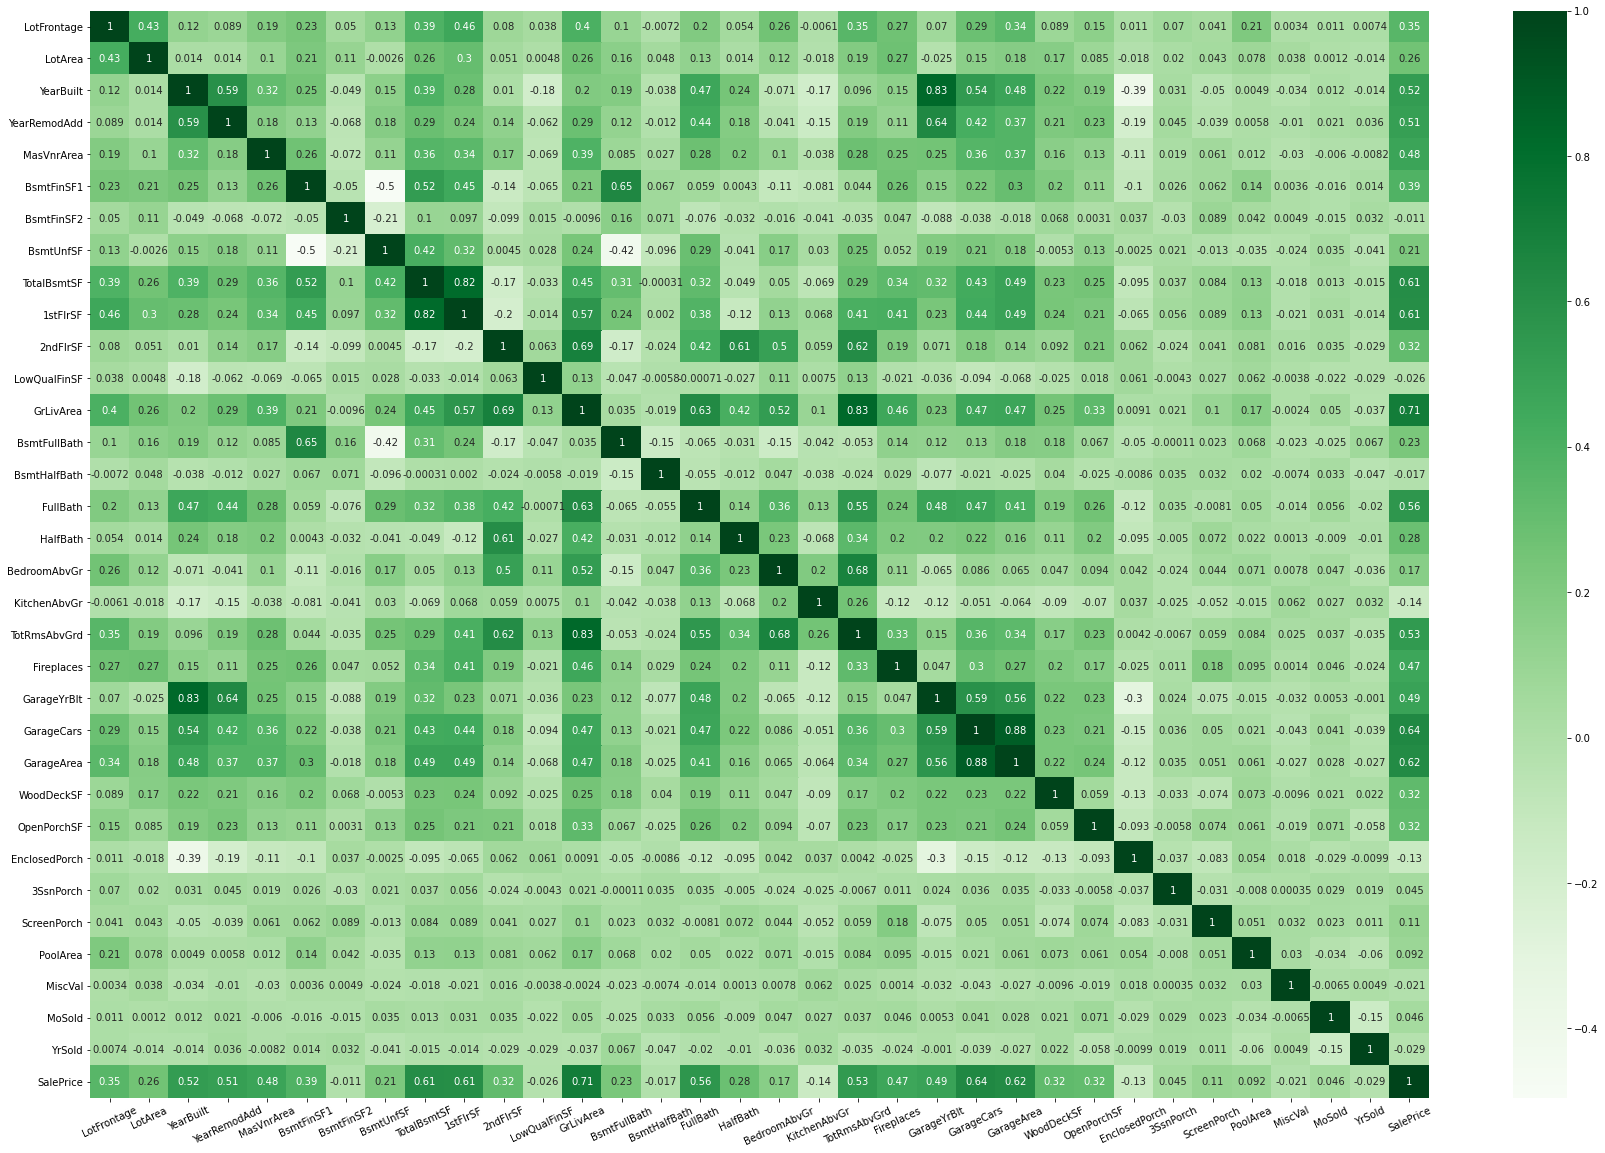

In [19]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize = (30,20))

# heatmap
sns.heatmap(cor, cmap = "Greens", annot = True)
plt.xticks(rotation = 25)

plt.show()

There appear to be a few patches of high correlation (for example: There is a high correlation of 0.83 between the variables 'GarageYrBlt' and 'YearBuilt').

In [20]:
# Dropping the correlated columns related to year:

house = house.drop(['YearRemodAdd', 'GarageYrBlt', 'YrSold'], axis = 1)
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,WD,Normal,181500


In [21]:
house.shape

(1460, 78)

In [22]:
# Dropping the aforementioned columns from the dataset 'house_numeric':

house_numeric = house_numeric.drop(['YearRemodAdd', 'GarageYrBlt', 'YrSold'], axis = 1)
house_numeric.head(2)

,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,65.0,8450,2003,196.0,706,0,150,856,856,854,...,548,0,61,0,0,0,0,0,2,208500
1,80.0,9600,1976,0.0,978,0,284,1262,1262,0,...,460,298,0,0,0,0,0,0,5,181500


In [23]:
house_numeric.shape

(1460, 31)

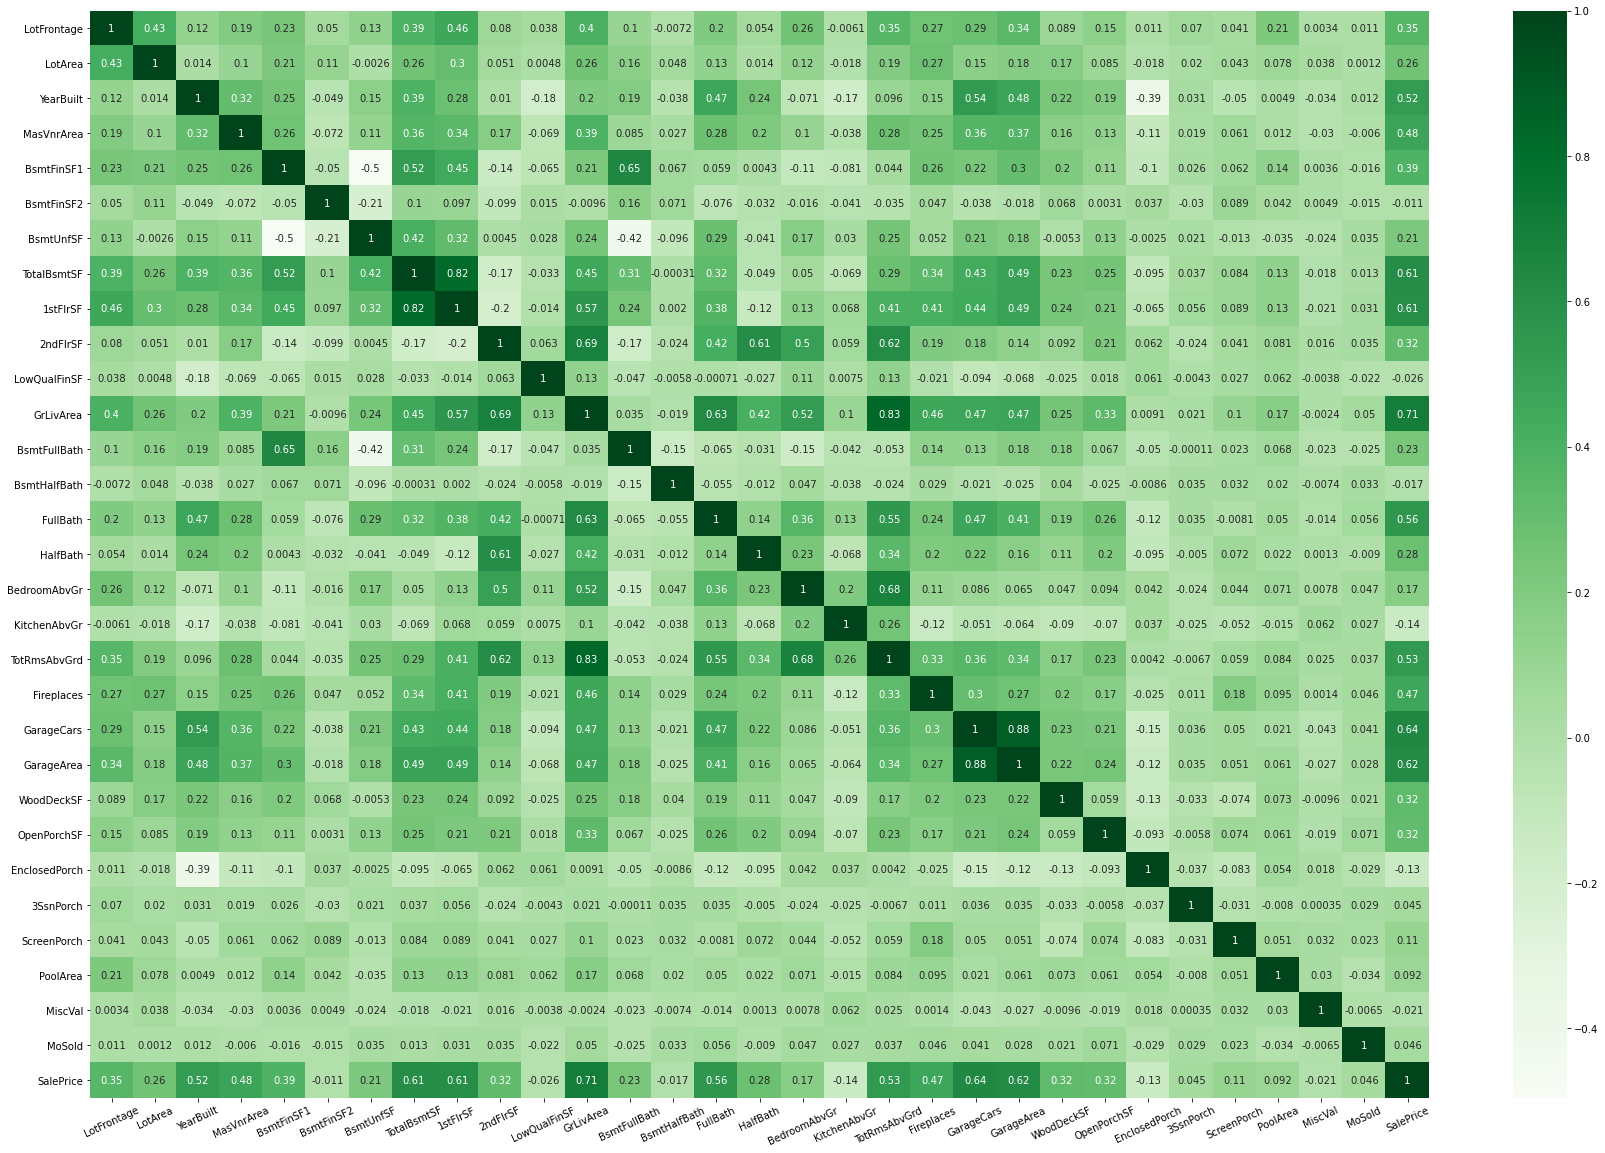

In [24]:
# Plotting correlations again on a heatmap

# figure size
plt.figure(figsize = (30,20))

# heatmap
sns.heatmap(house_numeric.corr(), cmap = "Greens", annot = True)
plt.xticks(rotation = 25)

plt.show()

#### 2.2 Outlier Analysis

In [25]:
# In the 'reading and understanding data' section, we saw that:
# Columns 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
# 'MiscVal', 'SalePrice' clearly have outliers
# I would visualize all but not 'SalePrice' as it is the target variable.

###### 2.2.1 'LotArea'

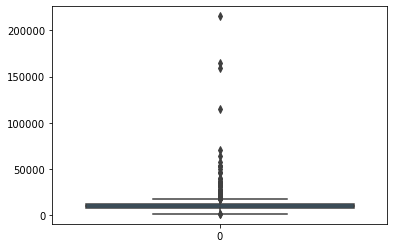

In [26]:
# Analysing the column 'LotArea' from the raw data frame 'house':
sns.boxplot(data = house['LotArea'])
plt.show()

In [27]:
# There are many values that are appearing above Q3. Let us do further mathematical analysis of outliers in this case:

# Calculating Quartile 1 for the values in the column 'LotArea' in the raw data frame 'house':
Q1 = house['LotArea'].quantile(0.25)

# Calculating Quartile 3 for the values in the column 'LotArea' in the raw data frame 'house':
Q3 = house['LotArea'].quantile(0.75)

# Calculating the Interquaritle range (IQR) for the values in the column 'LotArea' in the raw data frame 'house':
IQR = Q3 - Q1
extreme_outliers_below_Q1 = Q1 - (3 * IQR)
print("Value before which, the data points might be termed as 'Extreme Outliers' is :", extreme_outliers_below_Q1)
extreme_outliers_above_Q3 = Q3 + (3 * IQR)
print("Value after which, the data points might be termed as 'Extreme Outliers' is :", extreme_outliers_above_Q3)

Value before which, the data points might be termed as 'Extreme Outliers' is : -4590.5
Value after which, the data points might be termed as 'Extreme Outliers' is : 23745.5


In [28]:
# As per the describe performed in the 'Reading and Understanding Data' section:
# The min value in this column: 1300
# The max value in this column: 215245
# # Thus, the mathematical analysis also confirms that there are outliers in this column 'LotArea' beyond Q4.

In [29]:
# We should drop the values that lie beyond the extreme outlier value (23745.5) and then plot again:

# Creating a Pandas Series 'Outlier_an' and assigning the values less than or equal to 23745.5 from the 'LotArea' column from
# the data frame 'house':
Outlier_an = (house['LotArea'] <= 23745.5)

# Applying the Pandas series 'Outlier_an' on the column 'LotArea' in data frame 'house' to get the final values less than
# or equal to 23745.5:
Outlier_analysis = house['LotArea'][Outlier_an]

# Applying the value_counts function on the Pandas Series 'Outlier_analysis':
Outlier_analysis.value_counts()

7200     25
9600     24
6000     17
8400     14
9000     14
         ..
13031     1
10991     1
8944      1
6897      1
8190      1
Name: LotArea, Length: 1039, dtype: int64

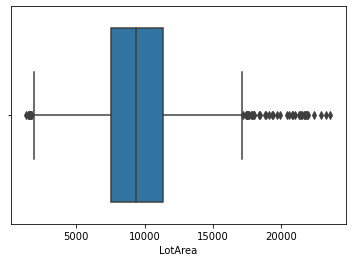

In [30]:
# Plotting a new boxplot with the extreme outlier values gone:
# (Box Plot of number of Total Visits with extreme outlier values removed):
sns.boxplot(Outlier_analysis)
plt.show()

###### 2.2.2 'MasVnrArea'

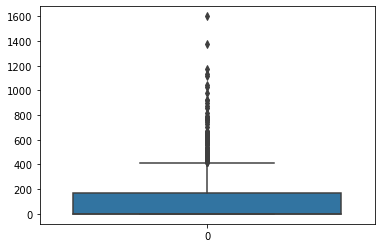

In [31]:
# Analysing the column 'MasVnrArea' from the raw data frame 'house':
sns.boxplot(data = house['MasVnrArea'])
plt.show()

In [32]:
# There are many values that are appearing above Q3. Let us do further mathematical analysis of outliers in this case:

# Calculating Quartile 1 for the values in the column 'MasVnrArea' in the raw data frame 'house':
Q1 = house['MasVnrArea'].quantile(0.25)

# Calculating Quartile 3 for the values in the column 'MasVnrArea' in the raw data frame 'house':
Q3 = house['MasVnrArea'].quantile(0.75)

# Calculating the Interquaritle range (IQR) for the values in the column 'MasVnrArea' in the raw data frame 'house':
IQR = Q3 - Q1
extreme_outliers_below_Q1 = Q1 - (3 * IQR)
print("Value before which, the data points might be termed as 'Extreme Outliers' is :", extreme_outliers_below_Q1)
extreme_outliers_above_Q3 = Q3 + (3 * IQR)
print("Value after which, the data points might be termed as 'Extreme Outliers' is :", extreme_outliers_above_Q3)

Value before which, the data points might be termed as 'Extreme Outliers' is : -498.0
Value after which, the data points might be termed as 'Extreme Outliers' is : 664.0


In [33]:
# As per the describe performed in the 'Reading and Understanding Data' section:
# The min value in this column: 0
# The max value in this column: 1600
# # Thus, the mathematical analysis also confirms that there are outliers in this column 'MasVnrArea' beyond Q4.

In [34]:
# We should drop the values that lie beyond the extreme outlier value (664) and then plot again:

# Creating a Pandas Series 'Outlier_an' and assigning the values less than or equal to 664 from the 'MasVnrArea' column from
# the data frame 'house':
Outlier_an = (house['MasVnrArea'] <= 664)

# Applying the Pandas series 'Outlier_an' on the column 'MasVnrArea' in data frame 'house' to get the final values less than
# or equal to 664:
Outlier_analysis = house['MasVnrArea'][Outlier_an]

# Applying the value_counts function on the Pandas Series 'Outlier_analysis':
Outlier_analysis.value_counts()

0.0      861
72.0       8
108.0      8
180.0      8
120.0      7
        ... 
97.0       1
528.0      1
554.0      1
53.0       1
415.0      1
Name: MasVnrArea, Length: 302, dtype: int64

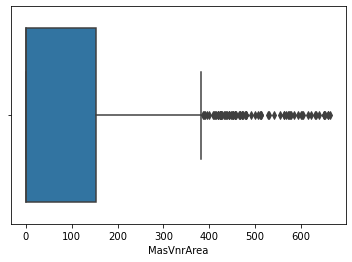

In [35]:
# Plotting a new boxplot with the extreme outlier values gone:
# (Box Plot of number of Total Visits with extreme outlier values removed):
sns.boxplot(Outlier_analysis)
plt.show()

###### 2.2.3 'BsmtFinSF1'

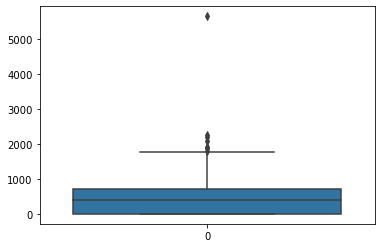

In [36]:
# Analysing the column 'BsmtFinSF1' from the raw data frame 'house':
sns.boxplot(data = house['BsmtFinSF1'])
plt.show()

In [37]:
# There appears to be just 1 value that is appearing to be an outlier. Let us do further mathematical analysis of outliers in
# this case:

# Calculating Quartile 1 for the values in the column 'BsmtFinSF1' in the raw data frame 'house':
Q1 = house['BsmtFinSF1'].quantile(0.25)

# Calculating Quartile 3 for the values in the column 'BsmtFinSF1' in the raw data frame 'house':
Q3 = house['BsmtFinSF1'].quantile(0.75)

# Calculating the Interquaritle range (IQR) for the values in the column 'BsmtFinSF1' in the raw data frame 'house':
IQR = Q3 - Q1
extreme_outliers_below_Q1 = Q1 - (3 * IQR)
print("Value before which, the data points might be termed as 'Extreme Outliers' is :", extreme_outliers_below_Q1)
extreme_outliers_above_Q3 = Q3 + (3 * IQR)
print("Value after which, the data points might be termed as 'Extreme Outliers' is :", extreme_outliers_above_Q3)

Value before which, the data points might be termed as 'Extreme Outliers' is : -2136.75
Value after which, the data points might be termed as 'Extreme Outliers' is : 2849.0


In [38]:
# As per the describe performed in the 'Reading and Understanding Data' section:
# The min value in this column: 0
# The max value in this column: 5644
# # Thus, the mathematical analysis also confirms that there are outliers in this column 'BsmtFinSF1' beyond Q4.

In [39]:
# We should drop the values that lie beyond the extreme outlier value (2849) and then plot again:

# Creating a Pandas Series 'Outlier_an' and assigning the values less than or equal to 2849 from the 'BsmtFinSF1' column from
# the data frame 'house':
Outlier_an = (house['BsmtFinSF1'] <= 2849)

# Applying the Pandas series 'Outlier_an' on the column 'BsmtFinSF1' in data frame 'house' to get the final values less than
# or equal to 2849:
Outlier_analysis = house['BsmtFinSF1'][Outlier_an]

# Applying the value_counts function on the Pandas Series 'Outlier_analysis':
Outlier_analysis.value_counts()

0       467
24       12
16        9
936       5
662       5
       ... 
535       1
534       1
532       1
522       1
2096      1
Name: BsmtFinSF1, Length: 636, dtype: int64

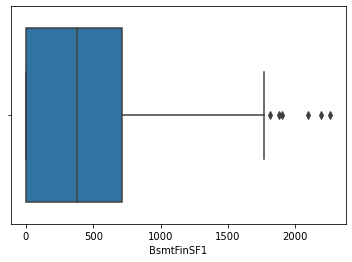

In [40]:
# Plotting a new boxplot with the extreme outlier values gone:
# (Box Plot of number of Total Visits with extreme outlier values removed):
sns.boxplot(Outlier_analysis)
plt.show()

###### 2.2.4 'OpenPorchSF'

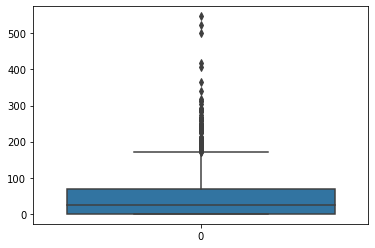

In [41]:
# Analysing the column 'OpenPorchSF' from the raw data frame 'house':
sns.boxplot(data = house['OpenPorchSF'])
plt.show()

In [42]:
# There are many values that are appearing above Q3. Let us do further mathematical analysis of outliers in this case:

# Calculating Quartile 1 for the values in the column 'OpenPorchSF' in the raw data frame 'house':
Q1 = house['OpenPorchSF'].quantile(0.25)

# Calculating Quartile 3 for the values in the column 'OpenPorchSF' in the raw data frame 'house':
Q3 = house['OpenPorchSF'].quantile(0.75)

# Calculating the Interquaritle range (IQR) for the values in the column 'OpenPorchSF' in the raw data frame 'house':
IQR = Q3 - Q1
extreme_outliers_below_Q1 = Q1 - (3 * IQR)
print("Value before which, the data points might be termed as 'Extreme Outliers' is :", extreme_outliers_below_Q1)
extreme_outliers_above_Q3 = Q3 + (3 * IQR)
print("Value after which, the data points might be termed as 'Extreme Outliers' is :", extreme_outliers_above_Q3)

Value before which, the data points might be termed as 'Extreme Outliers' is : -204.0
Value after which, the data points might be termed as 'Extreme Outliers' is : 272.0


In [43]:
# As per the describe performed in the 'Reading and Understanding Data' section:
# The min value in this column: 0
# The max value in this column: 547
# # Thus, the mathematical analysis also confirms that there are outliers in this column 'OpenPorchSF' beyond Q4.

In [44]:
# We should drop the values that lie beyond the extreme outlier value (272) and then plot again:

# Creating a Pandas Series 'Outlier_an' and assigning the values less than or equal to 272 from the 'BsmtFinSF1' column from
# the data frame 'house':
Outlier_an = (house['OpenPorchSF'] <= 272)

# Applying the Pandas series 'Outlier_an' on the column 'OpenPorchSF' in data frame 'house' to get the final values less than
# or equal to 2849:
Outlier_analysis = house['OpenPorchSF'][Outlier_an]

# Applying the value_counts function on the Pandas Series 'Outlier_analysis':
Outlier_analysis.value_counts()

0      656
36      29
48      22
20      21
45      19
      ... 
135      1
134      1
133      1
131      1
267      1
Name: OpenPorchSF, Length: 185, dtype: int64

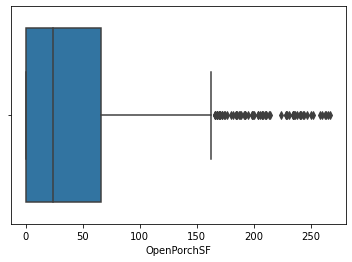

In [45]:
# Plotting a new boxplot with the extreme outlier values gone:
# (Box Plot of number of Total Visits with extreme outlier values removed):
sns.boxplot(Outlier_analysis)
plt.show()

###### 2.2.5 'EnclosedPorch'

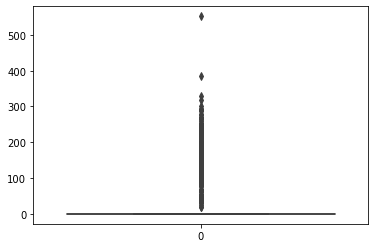

In [46]:
# Analysing the column 'EnclosedPorch' from the raw data frame 'house':
sns.boxplot(data = house['EnclosedPorch'])
plt.show()

In [47]:
# There are huge number of values that are appearing above Q3. Let us do further mathematical analysis of outliers in this case:

# Calculating Quartile 1 for the values in the column 'EnclosedPorch' in the raw data frame 'house':
Q1 = house['EnclosedPorch'].quantile(0.25)

# Calculating Quartile 3 for the values in the column 'EnclosedPorch' in the raw data frame 'house':
Q3 = house['EnclosedPorch'].quantile(0.75)

# Calculating the Interquaritle range (IQR) for the values in the column 'EnclosedPorch' in the raw data frame 'house':
IQR = Q3 - Q1
extreme_outliers_below_Q1 = Q1 - (3 * IQR)
print("Value before which, the data points might be termed as 'Extreme Outliers' is :", extreme_outliers_below_Q1)
extreme_outliers_above_Q3 = Q3 + (3 * IQR)
print("Value after which, the data points might be termed as 'Extreme Outliers' is :", extreme_outliers_above_Q3)

Value before which, the data points might be termed as 'Extreme Outliers' is : 0.0
Value after which, the data points might be termed as 'Extreme Outliers' is : 0.0


In [48]:
# As per the describe performed in the 'Reading and Understanding Data' section:
# The min value in this column: 0
# The max value in this column: 552
## Thus, the mathematical analysis also confirms that there are outliers in this column 'EnclosedPorch' beyond Q4.

In [49]:
# This is a peculiar case.
# We can see from the describe performed in the 'Reading and Understanding Data' section that up to 75th percentile, the value
# of this column is 0 and at 90th percentile, the value is 112.
# I would not do any further analysis on this column

###### 2.2.6 '3SsnPorch'

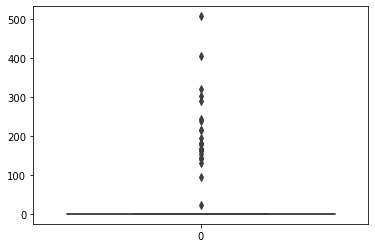

In [50]:
# Analysing the column '3SsnPorch' from the raw data frame 'house':
sns.boxplot(data = house['3SsnPorch'])
plt.show()

In [51]:
# There are huge number of values that are appearing above Q3. Let us do further mathematical analysis of outliers in this case:

# Calculating Quartile 1 for the values in the column '3SsnPorch' in the raw data frame 'house':
Q1 = house['3SsnPorch'].quantile(0.25)

# Calculating Quartile 3 for the values in the column '3SsnPorch' in the raw data frame 'house':
Q3 = house['3SsnPorch'].quantile(0.75)

# Calculating the Interquaritle range (IQR) for the values in the column '3SsnPorch' in the raw data frame 'house':
IQR = Q3 - Q1
extreme_outliers_below_Q1 = Q1 - (3 * IQR)
print("Value before which, the data points might be termed as 'Extreme Outliers' is :", extreme_outliers_below_Q1)
extreme_outliers_above_Q3 = Q3 + (3 * IQR)
print("Value after which, the data points might be termed as 'Extreme Outliers' is :", extreme_outliers_above_Q3)

Value before which, the data points might be termed as 'Extreme Outliers' is : 0.0
Value after which, the data points might be termed as 'Extreme Outliers' is : 0.0


In [52]:
# As per the describe performed in the 'Reading and Understanding Data' section:
# The min value in this column: 0
# The max value in this column: 508
## Thus, the mathematical analysis also confirms that there are outliers in this column '3SsnPorch' beyond Q4.

In [53]:
# Just like the 'EnclosedPorch' column (that was analyzed in section 2.2.5), this is also a peculiar case.
# We can see from the describe performed in the 'Reading and Understanding Data' section that up to 95th percentile, the value
# of this column is 0 and the value at 99th percentile is 168.
# I would not do any further analysis on this column

###### 2.2.7 'ScreenPorch'

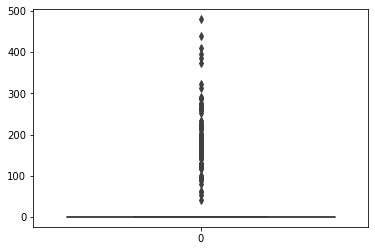

In [54]:
# Analysing the column 'ScreenPorch' from the raw data frame 'house':
sns.boxplot(data = house['ScreenPorch'])
plt.show()

In [55]:
# There are huge number of values that are appearing above Q3. Let us do further mathematical analysis of outliers in this case:

# Calculating Quartile 1 for the values in the column 'ScreenPorch' in the raw data frame 'house':
Q1 = house['ScreenPorch'].quantile(0.25)

# Calculating Quartile 3 for the values in the column 'ScreenPorch' in the raw data frame 'house':
Q3 = house['ScreenPorch'].quantile(0.75)

# Calculating the Interquaritle range (IQR) for the values in the column 'ScreenPorch' in the raw data frame 'house':
IQR = Q3 - Q1
extreme_outliers_below_Q1 = Q1 - (3 * IQR)
print("Value before which, the data points might be termed as 'Extreme Outliers' is :", extreme_outliers_below_Q1)
extreme_outliers_above_Q3 = Q3 + (3 * IQR)
print("Value after which, the data points might be termed as 'Extreme Outliers' is :", extreme_outliers_above_Q3)

Value before which, the data points might be termed as 'Extreme Outliers' is : 0.0
Value after which, the data points might be termed as 'Extreme Outliers' is : 0.0


In [56]:
# As per the describe performed in the 'Reading and Understanding Data' section:
# The min value in this column: 0
# The max value in this column: 480
## Thus, the mathematical analysis also confirms that there are outliers in this column 'ScreenPorch' beyond Q4.

In [57]:
# Just like the 'EnclosedPorch' column (that was analyzed in section 2.2.5) and the '3SsnPorch' column (analyzed in section
# 2.2.6), this is also a peculiar case.
# We can see from the describe performed in the 'Reading and Understanding Data' section that up to 90th percentile, the value
# of this column is 0, the value at 95th percentile is 160 and the value at the 99th percentile is 268.05.
# I would not do any further analysis on this column as well

###### 2.2.8 'PoolArea'

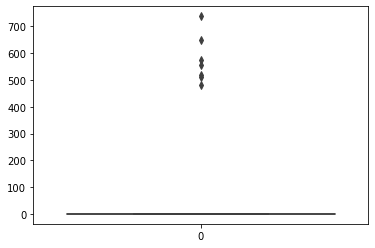

In [58]:
# Analysing the column 'PoolArea' from the raw data frame 'house':
sns.boxplot(data = house['PoolArea'])
plt.show()

In [59]:
# There are huge number of values that are appearing above Q3. Let us do further mathematical analysis of outliers in this case:

# Calculating Quartile 1 for the values in the column 'PoolArea' in the raw data frame 'house':
Q1 = house['PoolArea'].quantile(0.25)

# Calculating Quartile 3 for the values in the column 'PoolArea' in the raw data frame 'house':
Q3 = house['PoolArea'].quantile(0.75)

# Calculating the Interquaritle range (IQR) for the values in the column 'PoolArea' in the raw data frame 'house':
IQR = Q3 - Q1
extreme_outliers_below_Q1 = Q1 - (3 * IQR)
print("Value before which, the data points might be termed as 'Extreme Outliers' is :", extreme_outliers_below_Q1)
extreme_outliers_above_Q3 = Q3 + (3 * IQR)
print("Value after which, the data points might be termed as 'Extreme Outliers' is :", extreme_outliers_above_Q3)

Value before which, the data points might be termed as 'Extreme Outliers' is : 0.0
Value after which, the data points might be termed as 'Extreme Outliers' is : 0.0


In [60]:
# As per the describe performed in the 'Reading and Understanding Data' section:
# The min value in this column: 0
# The max value in this column: 738
## Thus, the mathematical analysis also confirms that there are outliers in this column 'PoolArea' beyond Q4.

In [61]:
# Just like the few columns (that was analyzed in sections 2.2.5 till 2.2.7), this is also a peculiar case.
# We can see from the describe performed in the 'Reading and Understanding Data' section that up to 95th percentile, the value
# of this column is 0 and the value at 99th percentile is 0 as well.
# I would not do any further analysis on this column

###### 2.2.9 'MiscVal'

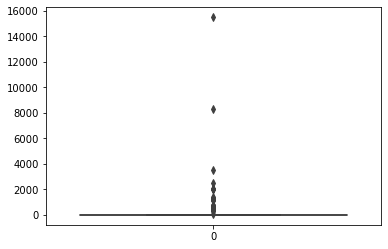

In [62]:
# Analysing the column 'MiscVal' from the raw data frame 'house':
sns.boxplot(data = house['MiscVal'])
plt.show()

In [63]:
# There are huge number of values that are appearing above Q3. Let us do further mathematical analysis of outliers in this case:

# Calculating Quartile 1 for the values in the column 'MiscVal' in the raw data frame 'house':
Q1 = house['MiscVal'].quantile(0.25)

# Calculating Quartile 3 for the values in the column MiscVal' in the raw data frame 'house':
Q3 = house['MiscVal'].quantile(0.75)

# Calculating the Interquaritle range (IQR) for the values in the column 'MiscVal' in the raw data frame 'house':
IQR = Q3 - Q1
extreme_outliers_below_Q1 = Q1 - (3 * IQR)
print("Value before which, the data points might be termed as 'Extreme Outliers' is :", extreme_outliers_below_Q1)
extreme_outliers_above_Q3 = Q3 + (3 * IQR)
print("Value after which, the data points might be termed as 'Extreme Outliers' is :", extreme_outliers_above_Q3)

Value before which, the data points might be termed as 'Extreme Outliers' is : 0.0
Value after which, the data points might be termed as 'Extreme Outliers' is : 0.0


In [64]:
# As per the describe performed in the 'Reading and Understanding Data' section:
# The min value in this column: 0
# The max value in this column: 15500
## Thus, the mathematical analysis also confirms that there are outliers in this column 'MiscVal' beyond Q4.

In [65]:
# Just like the few columns (that was analyzed in sections 2.2.5 till 2.2.8), this is also a peculiar case.
# We can see from the describe performed in the 'Reading and Understanding Data' section that up to 95th percentile, the value
# of this column is 0 and the value at 99th percentile is 700.
# I would not do any further analysis on this column

In [66]:
# These columns are highly skewed and might be dropped in further analysis: 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
# 'PoolArea' and 'MiscVal'

## Step 3: Data Cleaning and Mapping

In [67]:
# Checking the first 5 rows of the dataset 'house':
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,WD,Normal,250000


In [68]:
# Checking the shape of the dataset 'house':
house.shape

(1460, 78)

#### 3.1 Mapping

In [69]:
# As per the domain knowledge, mapping the columns:

def ls_mapper(x):
    return x.map({'Reg': 3, "IR1": 2, "IR2": 1, "IR3": 0})

def landslope_mapper(x):
    return x.map({'Gtl': 2, "Mod": 1, "Sev": 0})

def ratings_mapper1(x):
    return x.map({'Ex': 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0})

def ratings_mapper2(x):
    return x.map({'Gd': 4, "Av": 3, "Mn": 2, "No": 1, "None": 0})

def ratings_mapper3(x):
    return x.map({'GLQ': 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ": 2, 'Unf': 1, 'None': 0})

def func_mapper(x):
    return x.map({'Typ': 7, "Min1": 6, "Min2": 5, "Mod": 4, "Maj1": 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0})

def gf_mapper(x):
    return x.map({'Fin': 3, "RFn": 2, "Unf": 1, "None": 0})

def fence_mapper(x):
    return x.map({'GdPrv': 4, "MnPrv": 3, "GdWo": 2, "MnWw": 1, "None": 0})


# Applying the functions to the relevant columns:
house[['LotShape']] = house[['LotShape']].apply(ls_mapper)
house[['LandSlope']] = house[['LandSlope']].apply(landslope_mapper)
house[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond',
       'PoolQC']] = house[['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
                           'GarageQual', 'GarageCond', 'PoolQC']].apply(ratings_mapper1)
house[['BsmtExposure']] = house[['BsmtExposure']].apply(ratings_mapper2)
house[['BsmtFinType1', 'BsmtFinType2']] = house[['BsmtFinType1', 'BsmtFinType2']].apply(ratings_mapper3)
house[['Functional']] = house[['Functional']].apply(func_mapper)
house[['GarageFinish']] = house[['GarageFinish']].apply(gf_mapper)
house[['Fence']] = house[['Fence']].apply(fence_mapper)

In [70]:
mapped_cols = ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual',
               'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','Functional',
               'GarageFinish', 'Fence']

In [71]:
# Checking the columns that I have mapped in the dataset 'house':
house[mapped_cols].head()

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,PoolQC,BsmtExposure,BsmtFinType1,BsmtFinType2,Functional,GarageFinish,Fence
0,3,2,4,3,4.0,3.0,5,4,NaN,3.0,3.0,NaN,1.0,6.0,1.0,7,2.0,NaN
1,3,2,3,3,4.0,3.0,5,3,3.0,3.0,3.0,NaN,4.0,5.0,1.0,7,2.0,NaN
2,2,2,4,3,4.0,3.0,5,4,3.0,3.0,3.0,NaN,2.0,6.0,1.0,7,2.0,NaN
3,2,2,3,3,3.0,4.0,4,4,4.0,3.0,3.0,NaN,1.0,5.0,1.0,7,1.0,NaN
4,2,2,4,3,4.0,3.0,5,4,3.0,3.0,3.0,NaN,3.0,6.0,1.0,7,2.0,NaN


In [72]:
house.shape

(1460, 78)

#### 3.2 Missing Value Treatment

###### 3.2.1 Missing Value Analysis and Treatment

In [73]:
# Again, checking the percentage of missing values in these columns in the dataset 'house':
round(100*(house[['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']].isnull().sum()/len(house.index)),2).sort_values(ascending =
                                                                                                                  False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

We see that there are a lot of null values here. But as per the domain knowledge, most of these are not actually null values.

In [74]:
# I would be replacing NaN values in such columns instead of dropping those columns
house['PoolQC'].fillna('No Pool', inplace = True)
house['MiscFeature'].fillna('None', inplace = True)
house['Alley'].fillna('No Alley', inplace = True)
house['Fence'].fillna('No Fence', inplace = True)
house['FireplaceQu'].fillna('No Fireplace', inplace = True)
house['GarageType'].fillna('No Garage', inplace = True)
house['GarageFinish'].fillna('No Garage', inplace = True)
house['GarageQual'].fillna('No Garage', inplace = True)
house['GarageCond'].fillna('No Garage', inplace = True)
house['BsmtExposure'].fillna('No Basement', inplace = True)
house['BsmtFinType2'].fillna('No Basement', inplace = True)
house['BsmtFinType1'].fillna('No Basement', inplace = True)
house['BsmtCond'].fillna('No Basement', inplace = True)
house['BsmtQual'].fillna('No Basement', inplace = True)

In [75]:
# Filling the mean value in numerical column 'LotFrontage' wherever there are NaN values:
house['LotFrontage'].fillna((house['LotFrontage'].mean()), inplace = True)

# Removing rows wherever 'MasVnrType', 'MasVnrArea', 'Electrical' is NaN:
house = house[pd.notnull(house['MasVnrType'])]
house = house[pd.notnull(house['MasVnrArea'])]
house = house[pd.notnull(house['Electrical'])]

###### 3.2.2 Missing Value Analysis After the Treatment

In [76]:
# Checking % of Null values again:
round(100 * (house.isnull().sum()/len(house.index)),2).sort_values(ascending = False)

Id             0.0
HalfBath       0.0
FireplaceQu    0.0
Fireplaces     0.0
Functional     0.0
              ... 
MasVnrArea     0.0
MasVnrType     0.0
Exterior2nd    0.0
Exterior1st    0.0
SalePrice      0.0
Length: 78, dtype: float64

In [77]:
# Displaying only those columns which have missing values:
house.columns[house.isna().any()].tolist()

[]

In [78]:
# Thus all the missing values till now have been treated and there are no remaining missing values

#### 3.3 Skewed Column Treatment

In [79]:
# Storing all the numeric (float and int) variables in a new dataset 'house_numeric1':
house_numeric1 = house.select_dtypes(include = ['float64', 'int64'])
house_numeric1.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,MasVnrArea,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,1,60,65.0,8450,3,2,7,5,2003,196.0,...,548,0,61,0,0,0,0,0,2,208500
1,2,20,80.0,9600,3,2,6,8,1976,0.0,...,460,298,0,0,0,0,0,0,5,181500
2,3,60,68.0,11250,2,2,7,5,2001,162.0,...,608,0,42,0,0,0,0,0,9,223500
3,4,70,60.0,9550,2,2,7,5,1915,0.0,...,642,0,35,272,0,0,0,0,2,140000
4,5,60,84.0,14260,2,2,8,5,2000,350.0,...,836,192,84,0,0,0,0,0,12,250000


In [80]:
house_numeric1 = house_numeric1.drop(['SalePrice'], axis = 1)
house_numeric1.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,MasVnrArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold
0,1,60,65.0,8450,3,2,7,5,2003,196.0,...,2,548,0,61,0,0,0,0,0,2
1,2,20,80.0,9600,3,2,6,8,1976,0.0,...,2,460,298,0,0,0,0,0,0,5
2,3,60,68.0,11250,2,2,7,5,2001,162.0,...,2,608,0,42,0,0,0,0,0,9
3,4,70,60.0,9550,2,2,7,5,1915,0.0,...,3,642,0,35,272,0,0,0,0,2
4,5,60,84.0,14260,2,2,8,5,2000,350.0,...,3,836,192,84,0,0,0,0,0,12


In [81]:
house_numeric_cols = house_numeric1.columns
house_numeric_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold'],
      dtype='object')

In [82]:
# Check the skew of all numerical features:
skewed_features_numeric = house_numeric1.apply(lambda x: x.dropna().skew())
skewed_features_numeric1 = skewed_features_numeric[skewed_features_numeric > 0.85].index
print("\nHighly skewed features: \n\n{}".format(skewed_features_numeric1.tolist()))


Highly skewed features: 

['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'ExterCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [83]:
# Storing all the object type variables in a new dataset 'house_categorical':
house_categorical = house.select_dtypes(include = ['object'])
house_categorical.head(2)

,MSZoning,Street,Alley,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,No Alley,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,...,Attchd,2.0,3.0,3.0,Y,No Pool,No Fence,None,WD,Normal
1,RL,Pave,No Alley,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,...,Attchd,2.0,3.0,3.0,Y,No Pool,No Fence,None,WD,Normal


In [84]:
house_categorical.shape

(1451, 36)

In [85]:
house_categorical.columns

Index(['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [86]:
# Check the skew of all categorical features and display the columns having more than 85% skew ((1451 * 85% = 1233.35)):
skewed_features_categorical = []
for col in house_categorical:
    if(house[col].value_counts().max() >= 1233):
        skewed_features_categorical.append(col)
skewed_features_categorical

['Street',
 'Alley',
 'LandContour',
 'Utilities',
 'Condition1',
 'Condition2',
 'RoofMatl',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'MiscFeature',
 'SaleType']

In [87]:
house.shape

(1451, 78)

In [88]:
# Dropping highly skewed numeric as well as categorical columns:
house.drop(skewed_features_numeric1, axis = 1, inplace = True)
house.drop(skewed_features_categorical, axis = 1, inplace = True)
house.head(2)    

,Id,MSZoning,LotShape,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,...,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,Fence,MoSold,SaleCondition,SalePrice
0,1,RL,3,Inside,2,CollgCr,1Fam,2Story,7,5,...,0,No Fireplace,Attchd,2.0,2,548,No Fence,2,Normal,208500
1,2,RL,3,FR2,2,Veenker,1Fam,1Story,6,8,...,1,3.0,Attchd,2.0,2,460,No Fence,5,Normal,181500


In [89]:
# Checking the column 'LandSlope':
house['LandSlope'].value_counts()

2    1373
1      65
0      13
Name: LandSlope, dtype: int64

In [90]:
house['LandSlope'].value_counts(normalize = True)

2    0.946244
1    0.044797
0    0.008959
Name: LandSlope, dtype: float64

In [91]:
# The column 'LandSlope' is also highly skewed, thus, I am dropping it as well:
# Also dropping the 'Id' column as it is not required:

house = house.drop(['Id', 'LandSlope'], axis = 1)
house.head(2)

,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,...,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,Fence,MoSold,SaleCondition,SalePrice
0,RL,3,Inside,CollgCr,1Fam,2Story,7,5,2003,Gable,...,0,No Fireplace,Attchd,2.0,2,548,No Fence,2,Normal,208500
1,RL,3,FR2,Veenker,1Fam,1Story,6,8,1976,Gable,...,1,3.0,Attchd,2.0,2,460,No Fence,5,Normal,181500


In [92]:
house.shape

(1451, 37)

In [93]:
house.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', '2ndFlrSF',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'Fence', 'MoSold',
       'SaleCondition', 'SalePrice'],
      dtype='object')

#### 3.4 Outlier Treatment

In [94]:
# Since many columns got dropped from the dataframe 'house' in section 3.3, I would be performing the selection of the numeric
# columns again and storing the output in a new data frame 'house_numeric2'

# Storing all the numeric (float and int) variables in a new dataset 'house_numeric':
house_numeric2 = house.select_dtypes(include=['float64', 'int64'])
house_numeric2.head(2)

,LotShape,OverallQual,OverallCond,YearBuilt,ExterQual,HeatingQC,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,MoSold,SalePrice
0,3,7,5,2003,4,5,854,1,2,1,3,4,8,7,0,2,548,2,208500
1,3,6,8,1976,3,5,0,0,2,0,3,3,6,7,1,2,460,5,181500


In [95]:
def drop_outliers(x):
    for col in house_numeric2:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3 - Q1
        x =  x[(x[col] >= (Q1 - (1.5 * IQR))) & (x[col] <= (Q3 + (1.5 * IQR)))]
    return x   

house = drop_outliers(house)

In [96]:
house.head(2)

,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,...,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,Fence,MoSold,SaleCondition,SalePrice
0,RL,3,Inside,CollgCr,1Fam,2Story,7,5,2003,Gable,...,0,No Fireplace,Attchd,2.0,2,548,No Fence,2,Normal,208500
1,RL,3,FR2,Veenker,1Fam,1Story,6,8,1976,Gable,...,1,3.0,Attchd,2.0,2,460,No Fence,5,Normal,181500


In [97]:
house.shape

(1341, 37)

#### 3.5 Missing Value Analysis

In [98]:
# Since I did further data cleaning after section 3.2.2, it is necessary to confirm that there are no missing values before
# I can proceed with the section 4 - "Data Preparation":

# Checking % of Null values again:
round(100 * (house.isnull().sum()/len(house.index)),2).sort_values(ascending = False)

MSZoning         0.0
2ndFlrSF         0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageFinish     0.0
GarageCars       0.0
GarageArea       0.0
Fence            0.0
MoSold           0.0
SaleCondition    0.0
BsmtFullBath     0.0
HeatingQC        0.0
LotShape         0.0
BsmtFinType1     0.0
LotConfig        0.0
Neighborhood     0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
RoofStyle        0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
ExterQual        0.0
Foundation       0.0
BsmtQual         0.0
BsmtExposure     0.0
SalePrice        0.0
dtype: float64

In [99]:
# Displaying only those columns which have missing values:
house.columns[house.isna().any()].tolist()

[]

In [100]:
# Thus missing values have been treated

In [101]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1341 non-null   object
 1   LotShape       1341 non-null   int64 
 2   LotConfig      1341 non-null   object
 3   Neighborhood   1341 non-null   object
 4   BldgType       1341 non-null   object
 5   HouseStyle     1341 non-null   object
 6   OverallQual    1341 non-null   int64 
 7   OverallCond    1341 non-null   int64 
 8   YearBuilt      1341 non-null   int64 
 9   RoofStyle      1341 non-null   object
 10  Exterior1st    1341 non-null   object
 11  Exterior2nd    1341 non-null   object
 12  MasVnrType     1341 non-null   object
 13  ExterQual      1341 non-null   int64 
 14  Foundation     1341 non-null   object
 15  BsmtQual       1341 non-null   object
 16  BsmtExposure   1341 non-null   object
 17  BsmtFinType1   1341 non-null   object
 18  HeatingQC      1341 non-null

## Step 4: Data Preparation

In [102]:
# Converting the following to number of years:
house['YearBuilt'] = 2021 - house['YearBuilt']

In [103]:
# Displaying only those columns which have missing values:
house.columns[house.isna().any()].tolist()

[]

In [104]:
house[['YearBuilt']].head()

,YearBuilt
0,18
1,45
2,20
3,106
4,21


In [105]:
# I would not need to create dummy variables for the categorical columns. Checking the first two rows of the categorical
# columns:
house_categorical1 = house.select_dtypes(include = ['object'])
house_categorical1.head(2)

,MSZoning,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,FireplaceQu,GarageType,GarageFinish,Fence,SaleCondition
0,RL,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,4.0,1.0,6.0,No Fireplace,Attchd,2.0,No Fence,Normal
1,RL,FR2,Veenker,1Fam,1Story,Gable,MetalSd,MetalSd,None,CBlock,4.0,4.0,5.0,3.0,Attchd,2.0,No Fence,Normal


In [106]:
house_categorical1.shape

(1341, 18)

In [107]:
house_categorical1.columns

Index(['MSZoning', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'Fence', 'SaleCondition'],
      dtype='object')

In [108]:
# Convert into dummies
house_dummies = pd.get_dummies(house_categorical1, drop_first = True)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,...,GarageFinish_No Garage,Fence_2.0,Fence_3.0,Fence_4.0,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [109]:
house_dummies.shape

(1341, 121)

In [110]:
# Dropping the columns for which we have dummy values.
house = house.drop(list(house_categorical1.columns), axis = 1)
house.columns

Index(['LotShape', 'OverallQual', 'OverallCond', 'YearBuilt', 'ExterQual',
       'HeatingQC', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'SalePrice'],
      dtype='object')

In [111]:
house.shape

(1341, 19)

In [112]:
house = pd.concat([house, house_dummies], axis = 1)

In [113]:
house.head(2)

,LotShape,OverallQual,OverallCond,YearBuilt,ExterQual,HeatingQC,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,...,GarageFinish_No Garage,Fence_2.0,Fence_3.0,Fence_4.0,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3,7,5,18,4,5,854,1,2,1,...,0,0,0,0,1,0,0,0,1,0
1,3,6,8,45,3,5,0,0,2,0,...,0,0,0,0,1,0,0,0,1,0


In [114]:
house.columns

Index(['LotShape', 'OverallQual', 'OverallCond', 'YearBuilt', 'ExterQual',
       'HeatingQC', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath',
       ...
       'GarageFinish_No Garage', 'Fence_2.0', 'Fence_3.0', 'Fence_4.0',
       'Fence_No Fence', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=140)

Here, we need to check if the target variable 'SalePrice' is normally distributed or not ==>> Before Splitting and Scaling

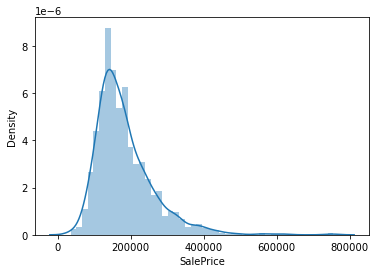

In [115]:
sns.distplot(house['SalePrice'])
plt.show()

This plot does not appear to have a proper normal distribution, especially towards its right side. This means that there are outliers towards that side. I would first proceed as it is for the Multiple Linear Regression modeling. But I would transform the target variable 'SalePrice' before the regularization.

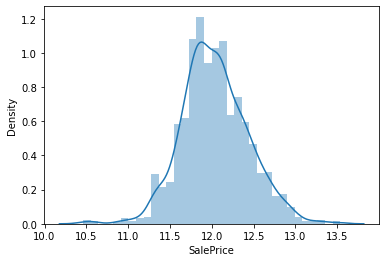

In [116]:
# Converting the target variable 'SalePrice' using log and checking again:
sns.distplot(np.log1p(house['SalePrice']))
plt.show()

In [ ]:
# This plot appears to have normal distrubution

## Step 5: Splitting the Data in to Train and Testing Sets

In [117]:
# Importing necessary library:
from sklearn.model_selection import train_test_split

In [118]:
# Performing the test-train split:
df_train, df_test = train_test_split(house, train_size = 0.7, test_size = 0.3, random_state = 100)

In [119]:
df_train.head()

,LotShape,OverallQual,OverallCond,YearBuilt,ExterQual,HeatingQC,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,...,GarageFinish_No Garage,Fence_2.0,Fence_3.0,Fence_4.0,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
564,2,7,5,29,4,5,1129,1,2,1,...,0,0,0,0,1,0,0,0,1,0
162,3,7,5,16,4,5,0,0,2,0,...,0,0,0,0,1,0,0,0,0,1
1199,3,4,5,58,3,4,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
819,2,7,5,12,4,5,0,1,2,0,...,0,0,0,0,1,0,0,0,0,1
60,3,6,5,17,3,5,0,1,1,1,...,0,0,0,0,1,0,0,0,0,1


In [120]:
df_train.shape

(938, 140)

In [121]:
df_test.head()

,LotShape,OverallQual,OverallCond,YearBuilt,ExterQual,HeatingQC,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,...,GarageFinish_No Garage,Fence_2.0,Fence_3.0,Fence_4.0,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
13,2,7,5,15,4,5,0,0,2,0,...,0,0,0,0,1,0,0,0,0,1
330,2,5,4,57,3,3,0,0,2,0,...,0,0,0,0,1,0,0,0,1,0
342,3,3,4,72,3,2,0,0,2,0,...,0,0,0,0,1,0,0,0,1,0
886,3,5,5,62,3,5,0,0,2,0,...,0,0,0,0,1,0,0,1,0,0
164,3,6,7,95,3,4,467,0,2,0,...,0,0,0,0,1,0,0,0,1,0


In [122]:
df_test.shape

(403, 140)

## Step 6: Scaling the Features

In [123]:
# Importing the relevant library:
from sklearn.preprocessing import MinMaxScaler

In [124]:
# Instantiating:
scaler = MinMaxScaler()

In [125]:
num_columns = house_numeric2.columns
num_columns

Index(['LotShape', 'OverallQual', 'OverallCond', 'YearBuilt', 'ExterQual',
       'HeatingQC', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold', 'SalePrice'],
      dtype='object')

In [126]:
# Since 'SalePrice' is the target variable, dropping it from the num_columns list:
num_columns = num_columns[0:-1]
num_columns

Index(['LotShape', 'OverallQual', 'OverallCond', 'YearBuilt', 'ExterQual',
       'HeatingQC', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageCars', 'GarageArea', 'MoSold'],
      dtype='object')

In [127]:
num_columns.shape

(18,)

In [128]:
# Apply scaler() to all the columns in the train data set except those containing mere '0-1' values and the 'dummy' variables:

df_train[num_columns] = scaler.fit_transform(df_train[num_columns])

In [129]:
df_train.head()

,LotShape,OverallQual,OverallCond,YearBuilt,ExterQual,HeatingQC,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,...,GarageFinish_No Garage,Fence_2.0,Fence_3.0,Fence_4.0,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
564,0.5,0.625,0.428571,0.138462,0.666667,1.000000,0.546731,0.5,0.666667,0.5,...,0,0,0,0,1,0,0,0,1,0
162,1.0,0.625,0.428571,0.038462,0.666667,1.000000,0.000000,0.0,0.666667,0.0,...,0,0,0,0,1,0,0,0,0,1
1199,1.0,0.250,0.428571,0.361538,0.333333,0.666667,0.000000,0.0,0.333333,0.5,...,0,0,0,0,1,0,0,0,1,0
819,0.5,0.625,0.428571,0.007692,0.666667,1.000000,0.000000,0.5,0.666667,0.0,...,0,0,0,0,1,0,0,0,0,1
60,1.0,0.500,0.428571,0.046154,0.333333,1.000000,0.000000,0.5,0.333333,0.5,...,0,0,0,0,1,0,0,0,0,1


In [130]:
df_train.shape

(938, 140)

In [131]:
df_train.describe()

,LotShape,OverallQual,OverallCond,YearBuilt,ExterQual,HeatingQC,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,...,GarageFinish_No Garage,Fence_2.0,Fence_3.0,Fence_4.0,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,...,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000
mean,0.800107,0.521055,0.516753,0.288404,0.468017,0.728500,0.172722,0.215885,0.521322,0.197761,...,0.047974,0.031983,0.097015,0.044776,0.818763,0.004264,0.006397,0.009595,0.827292,0.084222
std,0.269926,0.168636,0.155739,0.231191,0.190447,0.314804,0.215216,0.255219,0.181781,0.251071,...,0.213826,0.176049,0.296136,0.206922,0.385420,0.065198,0.079765,0.097534,0.378196,0.277868
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.375000,0.428571,0.069231,0.333333,0.333333,0.000000,0.000000,0.333333,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.500000,0.428571,0.261538,0.333333,1.000000,0.000000,0.000000,0.666667,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.625000,0.571429,0.423077,0.666667,1.000000,0.359201,0.500000,0.666667,0.500000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
df_train['SalePrice'].describe()

count       938.000000
mean     183112.945629
std       78070.087747
min       34900.000000
25%      132500.000000
50%      165000.000000
75%      214000.000000
max      745000.000000
Name: SalePrice, dtype: float64

In [133]:
# We can observe that the min values in all the columns (except 'SalePrice') are 0 and the max values in all the columns (except
# 'SalePrice') are 1. This means that our MinMax scaling has worked well.

# The values of the column 'SalePrice' are not within the range 0 and 1 as I have not scaled or transformed the values in this
# column

In [134]:
# As per the thumb rule, we usually apply 'scaler.fit_transform' on the train data & 'scaler.transform' on the test data

# Applying scaler() to all the columns in the test data set except those containing mere '0-1' values and the 'dummy' variables:
df_test[num_columns] = scaler.transform(df_test[num_columns])

In [135]:
df_test.head()

,LotShape,OverallQual,OverallCond,YearBuilt,ExterQual,HeatingQC,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,...,GarageFinish_No Garage,Fence_2.0,Fence_3.0,Fence_4.0,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
13,0.5,0.625,0.428571,0.030769,0.666667,1.000000,0.00000,0.0,0.666667,0.0,...,0,0,0,0,1,0,0,0,0,1
330,0.5,0.375,0.285714,0.353846,0.333333,0.333333,0.00000,0.0,0.666667,0.0,...,0,0,0,0,1,0,0,0,1,0
342,1.0,0.125,0.285714,0.469231,0.333333,0.000000,0.00000,0.0,0.666667,0.0,...,0,0,0,0,1,0,0,0,1,0
886,1.0,0.375,0.428571,0.392308,0.333333,1.000000,0.00000,0.0,0.666667,0.0,...,0,0,0,0,1,0,0,1,0,0
164,1.0,0.500,0.714286,0.646154,0.333333,0.666667,0.22615,0.0,0.666667,0.0,...,0,0,0,0,1,0,0,0,1,0


In [136]:
df_test.shape

(403, 140)

In [137]:
df_test.describe()

,LotShape,OverallQual,OverallCond,YearBuilt,ExterQual,HeatingQC,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,...,GarageFinish_No Garage,Fence_2.0,Fence_3.0,Fence_4.0,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,...,403.000000,403.000000,403.000000,403.000000,403.000000,403.0,403.000000,403.000000,403.000000,403.000000
mean,0.806452,0.515509,0.512939,0.291735,0.473118,0.699752,0.156564,0.204715,0.521092,0.187345,...,0.066998,0.034739,0.121588,0.032258,0.801489,0.0,0.009926,0.022333,0.794045,0.101737
std,0.279495,0.178287,0.151723,0.232505,0.192543,0.329174,0.204123,0.260888,0.185976,0.254831,...,0.250328,0.183347,0.327216,0.176904,0.399375,0.0,0.099255,0.147946,0.404901,0.302678
min,0.000000,-0.125000,0.142857,0.007692,0.000000,-0.333333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.375000,0.428571,0.069231,0.333333,0.333333,0.000000,0.000000,0.333333,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,1.000000,0.500000,0.428571,0.269231,0.333333,0.666667,0.000000,0.000000,0.666667,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.625000,0.571429,0.430769,0.666667,1.000000,0.338983,0.500000,0.666667,0.500000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.061538,1.000000,1.000000,0.906538,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [138]:
df_test['SalePrice'].describe()

count       403.000000
mean     182395.985112
std       83959.447439
min       37900.000000
25%      126837.500000
50%      164990.000000
75%      221250.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [139]:
# The min values are 0 in most columns and the max values are 1 in most columns. They are not exactly 0 and 1 respectively
# in a few columns because the scaler was fit on the training data set & the minimum (Xmin) and maximum (Xmax) values the
# transformer is using in this case are actually corresponding to the training set. Here, I have only transformed the test set
# using those min and max values.

# Transform on the test set has used the formula (X - Xmin)/(Xmax - Xmin) using the Xmin and Xmax values obtained after
# fitting and transforming on the training set.

# Note: 'SalePrice' is the predictor variable and I had not scaled it earlier.

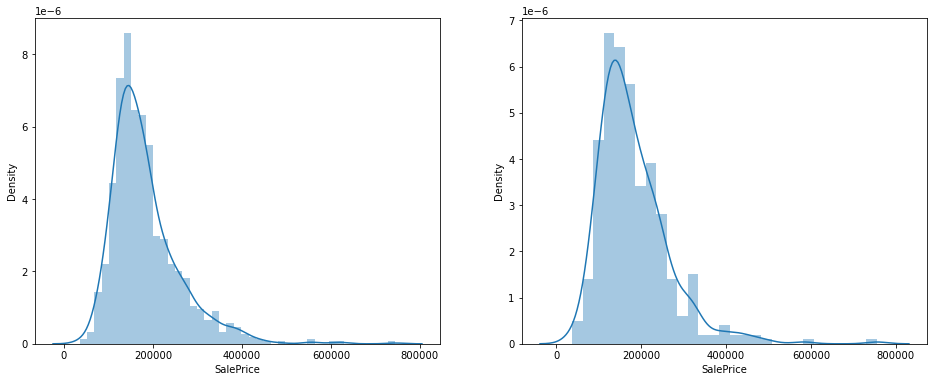

In [140]:
# Checking the distribution of the target variable 'SalePrice' again after splitting and scaling:

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(df_train['SalePrice'])
plt.subplot(1,2,2)
sns.distplot(df_test['SalePrice'])
plt.show()

In [141]:
# These graphs are showing similar trend like the untransformed one we observed in the section 4

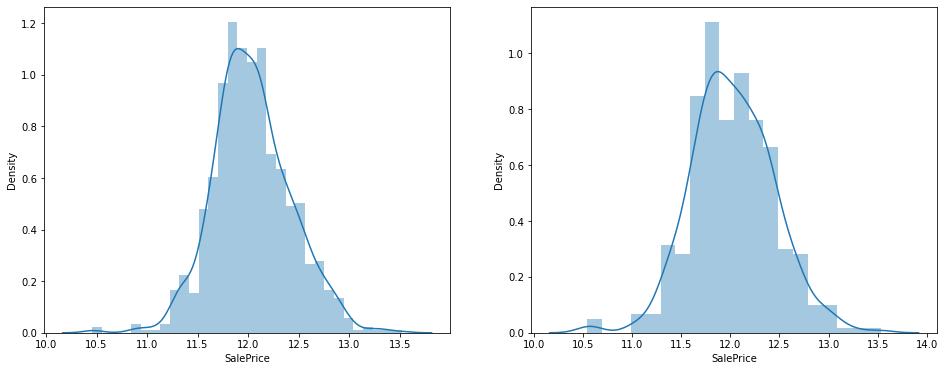

In [142]:
# Checking the distribution of the target variable 'SalePrice' again after splitting and scaling:
# This time, I would be transforming the target variable

plt.figure(figsize = (16,6))
plt.subplot(1,2,1)
sns.distplot(np.log1p(df_train['SalePrice']))
plt.subplot(1,2,2)
sns.distplot(np.log1p(df_test['SalePrice']))
plt.show()

In [143]:
# We can see that the graphs after transforming the target variable appear to be normally distributed

## Step 7: Dividing in to X_train, y_train, X_test and y_test sets for model building

In [144]:
# Assigning the data to 'y_train' after transformation:
y_train = np.log1p(df_train.pop('SalePrice'))

# Once the target variable 'SalePrice' has been popped out of the data frame 'df_train', we can assign the same to 'X_train':
X_train = df_train

In [145]:
# Viewing the first five rows of the new data frame 'X_train':
X_train.head()

,LotShape,OverallQual,OverallCond,YearBuilt,ExterQual,HeatingQC,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,...,GarageFinish_No Garage,Fence_2.0,Fence_3.0,Fence_4.0,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
564,0.5,0.625,0.428571,0.138462,0.666667,1.000000,0.546731,0.5,0.666667,0.5,...,0,0,0,0,1,0,0,0,1,0
162,1.0,0.625,0.428571,0.038462,0.666667,1.000000,0.000000,0.0,0.666667,0.0,...,0,0,0,0,1,0,0,0,0,1
1199,1.0,0.250,0.428571,0.361538,0.333333,0.666667,0.000000,0.0,0.333333,0.5,...,0,0,0,0,1,0,0,0,1,0
819,0.5,0.625,0.428571,0.007692,0.666667,1.000000,0.000000,0.5,0.666667,0.0,...,0,0,0,0,1,0,0,0,0,1
60,1.0,0.500,0.428571,0.046154,0.333333,1.000000,0.000000,0.5,0.333333,0.5,...,0,0,0,0,1,0,0,0,0,1


In [146]:
# Checking the shape of the new data frame 'X_train':
X_train.shape

(938, 139)

In [147]:
# Viewing the first five rows of the new Pandas Series 'y_train':
y_train.head()

564     12.498746
162     12.301387
1199    11.904974
819     12.319406
60      11.970357
Name: SalePrice, dtype: float64

In [148]:
# Checking the shape of the new Pandas Series 'y_train':
y_train.shape

(938,)

In [149]:
# Assigning the data to 'y_test' after transformation:
y_test = np.log1p(df_test.pop('SalePrice'))

# Once the target variable 'SalePrice' has been popped out of the data frame 'df_test', we can assign the same to 'X_test':
X_test = df_test

In [150]:
# Viewing the first five rows of the new data frame 'X_test':
X_test.head()

,LotShape,OverallQual,OverallCond,YearBuilt,ExterQual,HeatingQC,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,...,GarageFinish_No Garage,Fence_2.0,Fence_3.0,Fence_4.0,Fence_No Fence,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
13,0.5,0.625,0.428571,0.030769,0.666667,1.000000,0.00000,0.0,0.666667,0.0,...,0,0,0,0,1,0,0,0,0,1
330,0.5,0.375,0.285714,0.353846,0.333333,0.333333,0.00000,0.0,0.666667,0.0,...,0,0,0,0,1,0,0,0,1,0
342,1.0,0.125,0.285714,0.469231,0.333333,0.000000,0.00000,0.0,0.666667,0.0,...,0,0,0,0,1,0,0,0,1,0
886,1.0,0.375,0.428571,0.392308,0.333333,1.000000,0.00000,0.0,0.666667,0.0,...,0,0,0,0,1,0,0,1,0,0
164,1.0,0.500,0.714286,0.646154,0.333333,0.666667,0.22615,0.0,0.666667,0.0,...,0,0,0,0,1,0,0,0,1,0


In [151]:
# Checking the shape of the new data frame 'X_test':
X_test.shape

(403, 139)

In [152]:
# Viewing the first five rows of the new Pandas Series 'y_test':
y_test.head()

13     12.540761
330    11.686887
342    11.379406
886    11.884496
164    11.931642
Name: SalePrice, dtype: float64

In [153]:
# Checking the shape of the new Pandas Series 'y_test':
y_test.shape

(403,)

## Step 8: Building a Linear Model

#### 8.1: Building Plain Multiple Linear Regression Model with no feature selection

In [154]:
# Importing the relevant module from the statsmodels library
import statsmodels.api as sm

# Importing the relevant module from the sklearn library
from sklearn.linear_model import LinearRegression

In [155]:
# Instantiate
lm1 = LinearRegression()

# Fit a line
lm1.fit(X_train, y_train)

LinearRegression()

In [156]:
# Print the coefficients and intercept
print(lm1.intercept_)
print(lm1.coef_)

10.614793473666847
[-2.26005688e-02  4.48181788e-01  1.95999316e-01 -3.40272535e-02
 -6.67039832e-02  5.86508274e-02  4.98027477e-02  1.04377711e-01
  2.19904114e-01  1.18378533e-01  9.47766052e-02  1.38338921e-01
  4.24958223e-01  5.89109884e+12  1.53429997e-01  2.56446568e-02
  3.51684688e-01  3.04684015e-02  4.30697774e-01  3.66923467e-01
  3.65754569e-01  3.49863184e-01  3.34550542e-02 -6.18941043e-02
 -5.45067392e-02 -1.16850160e-02 -2.10245570e-01 -9.77557959e-02
  1.27454849e-02  5.01018986e-02 -1.89086393e-02  1.68491954e-01
 -9.65384829e-02 -5.38366061e-02 -8.45506380e-02 -1.51573650e-01
 -4.78665645e-02 -4.74085081e-02 -7.57203314e-02 -7.70645562e-02
  1.42963135e-01  1.06856988e-01 -9.08740166e-02 -3.72195422e-02
 -2.83110394e-02 -1.34782946e-02  2.19519963e-02  1.73160440e-01
 -5.21341396e-02  7.05291850e-02 -4.57513273e-02 -5.25673332e-02
 -1.24898387e-01 -7.40554860e-02 -1.15979797e-01 -1.57284977e-03
 -1.05234798e-02 -5.64075396e-02 -5.41468409e-02 -3.43969320e-02
 -2.66

In [157]:
from sklearn.metrics import r2_score, mean_squared_error

In [158]:
y_train_pred = lm1.predict(X_train)
y_test_pred = lm1.predict(X_test)

metric_MLR = []
r2_train_mlr = r2_score(y_train, y_train_pred)
print("R2 value on the train dataset is: ", r2_train_mlr)
metric_MLR.append(r2_train_mlr)

r2_test_mlr = r2_score(y_test, y_test_pred)
print("R2 value on the test dataset is: ", r2_test_mlr)
metric_MLR.append(r2_test_mlr)

rss1_mlr = np.sum(np.square(y_train - y_train_pred))
print("RSS value on the train dataset is: ", rss1_mlr)
metric_MLR.append(rss1_mlr)

rss2_mlr = np.sum(np.square(y_test - y_test_pred))
print("RSS value on the test dataset is: ", rss2_mlr)
metric_MLR.append(rss2_mlr)

mse_train_mlr = mean_squared_error(y_train, y_train_pred)
print("MSE value on the train dataset is: ", mse_train_mlr)
metric_MLR.append(mse_train_mlr)

mse_test_mlr = mean_squared_error(y_test, y_test_pred)
print("MSE value on the test dataset is: ", mse_test_mlr)
metric_MLR.append(mse_test_mlr)

R2 value on the train dataset is:  0.9088561957241631
R2 value on the test dataset is:  -2.5936190776527014e+17
RSS value on the train dataset is:  12.787860669889213
RSS value on the test dataset is:  1.8533084224377012e+19
MSE value on the train dataset is:  0.013633113720564192
MSE value on the test dataset is:  4.598780204560053e+16


In [159]:
# We can see that the R2 value on the train data set is 0.9088 (approx.) whereas that on the test data set is -2.5936e+17.
# This clearly indicates that model is overfitting the train data but performing extremely poorly on the test data

#### 8.2 Building a Multiple Linear Regression Model using RFE

In [160]:
from sklearn.feature_selection import RFE

In [161]:
# Running RFE with the output number of the variables equal to 50
rfe = RFE(lm1, 50)
rfe = rfe.fit(X_train, y_train)

In [162]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotShape', False, 51),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('ExterQual', False, 50),
 ('HeatingQC', True, 1),
 ('2ndFlrSF', False, 19),
 ('BsmtFullBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', False, 78),
 ('BedroomAbvGr', False, 24),
 ('KitchenQual', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Functional', False, 3),
 ('Fireplaces', True, 1),
 ('GarageCars', False, 11),
 ('GarageArea', True, 1),
 ('MoSold', False, 49),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotConfig_CulDSac', False, 18),
 ('LotConfig_FR2', False, 12),
 ('LotConfig_FR3', False, 10),
 ('LotConfig_Inside', False, 76),
 ('Neighborhood_Blueste', False, 35),
 ('Neighborhood_BrDale', True, 1),
 ('Neighborhood_BrkSide', False, 27),
 ('Neighborhood_ClearCr', True, 1),
 ('Neighborhood_CollgCr', False, 83),
 ('Neighborhood_Crawfor', True, 1),
 ('Neighborhood_Edwards', True, 1),
 ('Neighborhood_Gilbert', F

In [163]:
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'HeatingQC', 'BsmtFullBath',
       'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_StoneBr',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Unf', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_MetalSd', 'Exterior1st_Stone',
       'Exterior1st_VinylSd', 'Exterior2nd_AsphShn', 'Exterior2nd_CmentBd',
       'Exterior2nd_ImStucc', 'Exterior2nd_Plywood', 'Exterior2nd_Stone',
       'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_3.0', 'BsmtQual_4.0',
       'BsmtQual_5.0', 'BsmtQual_No Basement', 'BsmtExposure_4.0',
       'BsmtFinType1_No Basement', 

In [164]:
X_train.columns[~rfe.support_]

Index(['LotShape', 'ExterQual', '2ndFlrSF', 'HalfBath', 'BedroomAbvGr',
       'Functional', 'GarageCars', 'MoSold', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'Neighborhood_Blueste', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'BldgType_2fmCon', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Gambrel',
       'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'Exterior1st_AsphShn', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc',
       'Exterior1st_Plywood', 'Exterior1st_Stucco', 'Exterior1st_Wd Sdn

In [165]:
# Building the model using statsmodel, based on the information obtained after performing RFE on the X_Train data set

In [166]:
# Creating X_train_rfe_model dataframe with RFE selected variables
X_train_rfe_model = X_train[col]

In [167]:
X_train_rfe_model.head(2)

,OverallQual,OverallCond,YearBuilt,HeatingQC,BsmtFullBath,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageArea,...,BsmtQual_3.0,BsmtQual_4.0,BsmtQual_5.0,BsmtQual_No Basement,BsmtExposure_4.0,BsmtFinType1_No Basement,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
564,0.625,0.428571,0.138462,1.0,0.5,0.666667,0.666667,0.545455,0.333333,0.435103,...,0,1,0,0,0,0,0,0,1,0
162,0.625,0.428571,0.038462,1.0,0.0,0.666667,0.666667,0.363636,0.333333,0.392330,...,0,1,0,0,0,0,0,0,0,1


In [168]:
X_train_rfe_model.shape

(938, 50)

In [169]:
# Adding a constant variable 
X_train_rfe_model = sm.add_constant(X_train_rfe_model, has_constant = 'add')

In [170]:
X_train_rfe_model.head(2)

,const,OverallQual,OverallCond,YearBuilt,HeatingQC,BsmtFullBath,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,...,BsmtQual_3.0,BsmtQual_4.0,BsmtQual_5.0,BsmtQual_No Basement,BsmtExposure_4.0,BsmtFinType1_No Basement,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
564,1.0,0.625,0.428571,0.138462,1.0,0.5,0.666667,0.666667,0.545455,0.333333,...,0,1,0,0,0,0,0,0,1,0
162,1.0,0.625,0.428571,0.038462,1.0,0.0,0.666667,0.666667,0.363636,0.333333,...,0,1,0,0,0,0,0,0,0,1


In [171]:
X_train_rfe_model.shape

(938, 51)

In [172]:
lm2 = sm.OLS(y_train, X_train_rfe_model).fit()   # Running the linear model

In [173]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     156.9
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        21:01:58   Log-Likelihood:                 623.74
No. Observations:                 938   AIC:                            -1147.
Df Residuals:                     888   BIC:                            -905.3
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [174]:
X = X_train_rfe_model.drop(['const'], axis = 1)

In [175]:
X.columns

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'HeatingQC', 'BsmtFullBath',
       'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_StoneBr',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Unf', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_MetalSd', 'Exterior1st_Stone',
       'Exterior1st_VinylSd', 'Exterior2nd_AsphShn', 'Exterior2nd_CmentBd',
       'Exterior2nd_ImStucc', 'Exterior2nd_Plywood', 'Exterior2nd_Stone',
       'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_3.0', 'BsmtQual_4.0',
       'BsmtQual_5.0', 'BsmtQual_No Basement', 'BsmtExposure_4.0',
       'BsmtFinType1_No Basement', 

In [176]:
X.shape

(938, 50)

In [177]:
# The value of R-squared of the MLR model (based on RFE) is 0.896
# The value of adjusted R-Squared of the MLR model (based on RFE) is 0.891

In [178]:
# Creating 'X_test_m1' dataframe by dropping the least useful variables from 'X_test' data frame:
X_test_m1 = X_test[X.columns]

# Adding a constant variable to the test data frame 'X_test_m1':
X_test_m1 = sm.add_constant(X_test_m1, has_constant = 'add')

In [179]:
X_test_m1.head(2)

,const,OverallQual,OverallCond,YearBuilt,HeatingQC,BsmtFullBath,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,...,BsmtQual_3.0,BsmtQual_4.0,BsmtQual_5.0,BsmtQual_No Basement,BsmtExposure_4.0,BsmtFinType1_No Basement,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
13,1.0,0.625,0.428571,0.030769,1.000000,0.0,0.666667,0.666667,0.363636,0.333333,...,0,1,0,0,0,0,0,0,0,1
330,1.0,0.375,0.285714,0.353846,0.333333,0.0,0.666667,0.333333,0.636364,0.000000,...,1,0,0,0,0,0,0,0,1,0


In [180]:
X_test_m1.shape

(403, 51)

In [181]:
# Calculating the predicted values on the test data:
y_test_pred = lm2.predict(X_test_m1)

In [182]:
y_test_pred.head()

13     12.351971
330    11.803049
342    11.340610
886    11.710649
164    11.716371
dtype: float64

In [183]:
y_test_pred.shape

(403,)

In [184]:
# Importing necessary libraries:
from sklearn.metrics import mean_squared_error, r2_score

# Making predictions:

y_train_pred = lm2.predict(X_train_rfe_model)

metric_MLR_RFE = []
r2_train_rfe = r2_score(y_train, y_train_pred)
print("R2 value on the train dataset is: ", r2_train_rfe)
metric_MLR_RFE.append(r2_train_rfe)

r2_test_rfe = r2_score(y_test, y_test_pred)
print("R2 value on the test dataset is: ", r2_test_rfe)
metric_MLR_RFE.append(r2_test_rfe)

rss1_rfe = np.sum(np.square(y_train - y_train_pred))
print("RSS value on the train dataset is: ", rss1_rfe)
metric_MLR_RFE.append(rss1_rfe)

rss2_rfe = np.sum(np.square(y_test - y_test_pred))
print("RSS value on the test dataset is: ", rss2_rfe)
metric_MLR_RFE.append(rss2_rfe)

mse_train_rfe = mean_squared_error(y_train, y_train_pred)
print("MSE value on the train dataset is: ", mse_train_rfe)
metric_MLR_RFE.append(mse_train_rfe)

mse_test_rfe = mean_squared_error(y_test, y_test_pred)
print("MSE value on the test dataset is: ", mse_test_rfe)
metric_MLR_RFE.append(mse_test_rfe)

R2 value on the train dataset is:  0.8964689055312192
R2 value on the test dataset is:  0.8790880402583962
RSS value on the train dataset is:  14.525849799522764
RSS value on the test dataset is:  8.63994081834746
MSE value on the train dataset is:  0.015485980596506145
MSE value on the test dataset is:  0.021439059102599158


#### 8.3: Ridge Regression

In [185]:
# Importing the relevant library
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [186]:
# List of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
# list of alphas to tune
list_alpha = [0.0001,0.001,0.01,0.1, 0.5, 1, 5, 10, 20, 
 40, 50, 70, 100, 150, 200, 250, 300, 350, 400, 450, 500, 
 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 2000]
params = {'alpha': list_alpha}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring = 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score = True,
                        verbose = 1)

# Fitting the Ridge Regression on the output of the RFE Model:
model_cv.fit(X_train_rfe_model, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 20,
                                   40, 50, 70, 100, 150, 200, 250, 300, 350,
                                   400, 450, 500, 550, 600, 650, 700, 750, 800,
                                   850, 900, 950, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [187]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha'] <= 1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005401,0.001020,0.002800,0.000400,0.0001,{'alpha': 0.0001},-0.092841,-0.107362,-0.098164,-0.103647,...,-0.100273,0.004943,6,-0.093234,-0.090020,-0.092575,-0.090635,-0.091995,-0.091692,0.001197
1,0.004601,0.000489,0.003200,0.000403,0.001,{'alpha': 0.001},-0.092841,-0.107363,-0.098161,-0.103650,...,-0.100270,0.004945,5,-0.093234,-0.090019,-0.092577,-0.090635,-0.091996,-0.091692,0.001197
2,0.002601,0.002155,0.004930,0.005995,0.01,{'alpha': 0.01},-0.092841,-0.107369,-0.098134,-0.103678,...,-0.100242,0.004958,4,-0.093232,-0.090013,-0.092592,-0.090632,-0.092005,-0.091695,0.001202
3,0.005218,0.000978,0.003183,0.001002,0.1,{'alpha': 0.1},-0.092844,-0.107440,-0.097902,-0.103921,...,-0.100082,0.005083,3,-0.093214,-0.089956,-0.092731,-0.090611,-0.092075,-0.091718,0.001243
4,0.004201,0.000400,0.002400,0.000490,0.5,{'alpha': 0.5},-0.092840,-0.107972,-0.097229,-0.104644,...,-0.099725,0.005660,2,-0.093191,-0.089816,-0.093140,-0.090528,-0.092397,-0.091814,0.001388


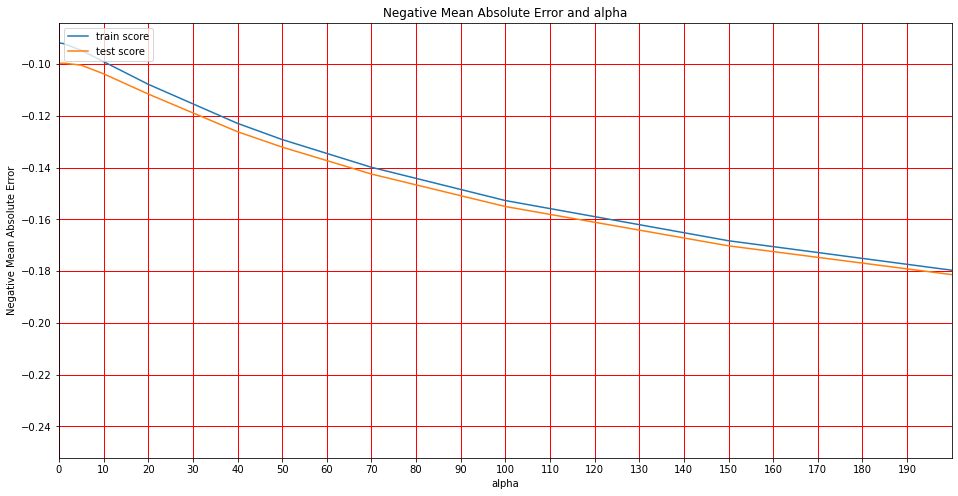

In [188]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize = (16, 8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc = 'upper left')
plt.xlim(0,200)
plt.xticks(np.arange(0, 200, 10))
plt.grid(color = 'r', linestyle = '-', linewidth = 1)
plt.show()

In [189]:
# Printing the best hyperparameter alpha:
print(model_cv.best_params_)

{'alpha': 1}


In [190]:
# Fitting Ridge model for alpha = 1 and printing coefficients which have been penalised
ridge = Ridge(alpha = 1)

ridge.fit(X_train_rfe_model, y_train)
ridge.coef_

array([ 0.        ,  0.51113242,  0.23497072, -0.19393363,  0.04956563,
        0.13361429,  0.17758663,  0.14570359,  0.49010622,  0.22928008,
        0.36096657,  0.32847362,  0.21673092,  0.27177547,  0.21352589,
       -0.04395252,  0.08688464,  0.15991482, -0.05560971, -0.10800329,
        0.20325368,  0.08588341, -0.04618051,  0.19681207, -0.07589075,
       -0.1269957 , -0.06073687, -0.13004704,  0.12976637, -0.00299022,
       -0.01196253,  0.0305719 ,  0.14668974,  0.03326954,  0.0437811 ,
        0.04873485,  0.05771591,  0.03414935, -0.06688127,  0.096802  ,
       -0.07122787,  0.03422931,  0.06835152,  0.13710989, -0.04400024,
        0.0810186 , -0.04400024,  0.04522805, -0.08193351,  0.06400057,
        0.08556561])

In [191]:
# Lets calculate some metrics such as R2 score, RSS and MSE:

y_train_pred = ridge.predict(X_train_rfe_model)
y_test_pred = ridge.predict(X_test_m1)

metric_Ridge = []
r2_train_ridge = r2_score(y_train, y_train_pred)
print("R2 value on the train dataset is: ", r2_train_ridge)
metric_Ridge.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_test_pred)
print("R2 value on the test dataset is: ", r2_test_ridge)
metric_Ridge.append(r2_test_ridge)

rss1_ridge = np.sum(np.square(y_train - y_train_pred))
print("RSS value on the train dataset is: ", rss1_ridge)
metric_Ridge.append(rss1_ridge)

rss2_ridge = np.sum(np.square(y_test - y_test_pred))
print("RSS value on the test dataset is: ", rss2_ridge)
metric_Ridge.append(rss2_ridge)

mse_train_ridge = mean_squared_error(y_train, y_train_pred)
print("MSE value on the train dataset is: ", mse_train_ridge)
metric_Ridge.append(mse_train_ridge)

mse_test_ridge = mean_squared_error(y_test, y_test_pred)
print("MSE value on the test dataset is: ", mse_test_ridge)
metric_Ridge.append(mse_test_ridge)

R2 value on the train dataset is:  0.8948538621517
R2 value on the test dataset is:  0.8782395354754495
RSS value on the train dataset is:  14.752447206523833
RSS value on the test dataset is:  8.700571967858316
MSE value on the train dataset is:  0.015727555657274874
MSE value on the test dataset is:  0.021589508605107485


#### 8.4 Lasso Regression

In [192]:
# Importing the relevant library:
from sklearn.linear_model import Lasso

In [193]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

# Fitting the Lasso Regression on the output of the RFE Model:
model_cv.fit(X_train_rfe_model, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 20,
                                   40, 50, 70, 100, 150, 200, 250, 300, 350,
                                   400, 450, 500, 550, 600, 650, 700, 750, 800,
                                   850, 900, 950, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [194]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006251,0.007656,0.006252,0.007657,0.0001,{'alpha': 0.0001},-0.092796,-0.108017,-0.097659,-0.104658,...,-0.100211,0.005430,1,-0.093417,-0.090206,-0.093419,-0.090775,-0.092386,-0.092040,0.001333
1,0.006252,0.007658,0.000000,0.000000,0.001,{'alpha': 0.001},-0.095710,-0.112821,-0.096118,-0.105118,...,-0.101504,0.006600,2,-0.097778,-0.093505,-0.097280,-0.094426,-0.097489,-0.096096,0.001771
2,0.007250,0.007080,0.003647,0.006405,0.01,{'alpha': 0.01},-0.136857,-0.145041,-0.133519,-0.130607,...,-0.134647,0.006096,3,-0.132778,-0.129206,-0.134587,-0.129934,-0.132853,-0.131872,0.002001
3,0.004003,0.000633,0.002198,0.000398,0.1,{'alpha': 0.1},-0.302889,-0.299428,-0.310347,-0.300792,...,-0.300676,0.006567,4,-0.300061,-0.301154,-0.298226,-0.300754,-0.303208,-0.300681,0.001614
4,0.003401,0.000492,0.002000,0.000003,0.5,{'alpha': 0.5},-0.302889,-0.299428,-0.310347,-0.300792,...,-0.300676,0.006567,4,-0.300061,-0.301154,-0.298226,-0.300754,-0.303208,-0.300681,0.001614


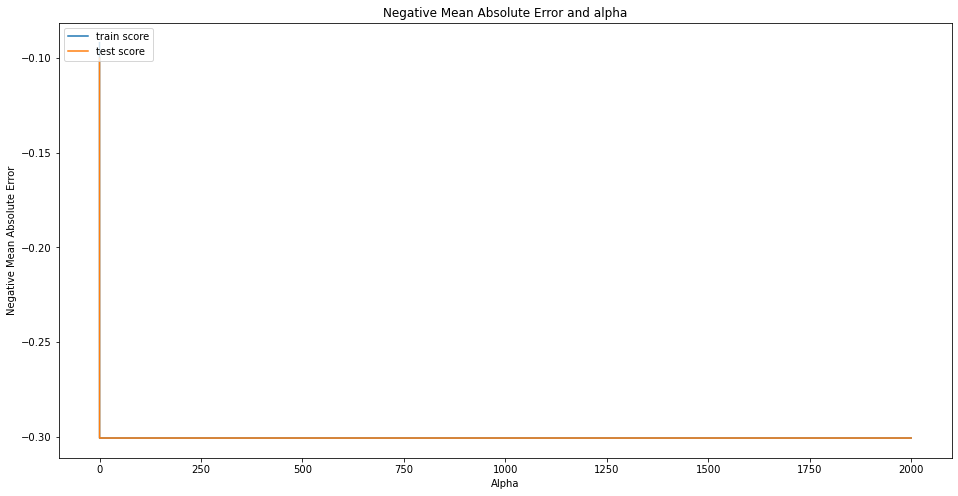

In [195]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize = (16, 8))

plt.plot((cv_results['param_alpha']), (cv_results['mean_train_score']))
plt.plot((cv_results['param_alpha']), (cv_results['mean_test_score']))
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')


plt.show()

In [196]:
model_cv.best_params_

{'alpha': 0.0001}

In [197]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

lasso = Lasso(alpha = 0.0001)
        
lasso.fit(X_train_rfe_model, y_train)

Lasso(alpha=0.0001)

In [198]:
lasso.coef_

array([ 0.        ,  0.53173815,  0.23681344, -0.19584079,  0.04669836,
        0.13349159,  0.16078253,  0.1364709 ,  0.51615413,  0.2257078 ,
        0.37582444,  0.42493403,  0.31451109,  0.35939104,  0.30286073,
       -0.03867748,  0.08510693,  0.15959682, -0.05229313, -0.09988501,
        0.20227661,  0.08551059, -0.04794841,  0.20311881, -0.07945736,
       -0.13128671, -0.05887778, -0.13342013,  0.1306479 , -0.        ,
        0.        ,  0.03165869,  0.16247208,  0.03254316,  0.01343632,
        0.03113435,  0.0527471 ,  0.03421213, -0.06721994,  0.11148101,
       -0.06248743,  0.03662103,  0.06926969,  0.1349936 , -0.07810966,
        0.08119602, -0.        ,  0.02580897, -0.08882515,  0.05683025,
        0.07721076])

In [199]:
# Lets calculate some metrics such as R2 score, RSS and MSE:

y_train_pred = lasso.predict(X_train_rfe_model)
y_test_pred = lasso.predict(X_test_m1)

metric_Lasso = []
r2_train_lasso = r2_score(y_train, y_train_pred)
print("R2 value on the train dataset is: ", r2_train_lasso)
metric_Lasso.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_test_pred)
print("R2 value on the test dataset is: ", r2_test_lasso)
metric_Lasso.append(r2_test_lasso)

rss1_lasso = np.sum(np.square(y_train - y_train_pred))
print("RSS value on the train dataset is: ", rss1_lasso)
metric_Lasso.append(rss1_lasso)

rss2_lasso = np.sum(np.square(y_test - y_test_pred))
print("RSS value on the test dataset is: ", rss2_lasso)
metric_Lasso.append(rss2_lasso)

mse_train_lasso = mean_squared_error(y_train, y_train_pred)
print("MSE value on the train dataset is: ", mse_train_lasso)
metric_Lasso.append(mse_train_lasso)

mse_test_lasso = mean_squared_error(y_test, y_test_pred)
print("MSE value on the test dataset is: ", mse_test_lasso)
metric_Lasso.append(mse_test_lasso)

R2 value on the train dataset is:  0.8959314438744501
R2 value on the test dataset is:  0.8805571200680236
RSS value on the train dataset is:  14.601257939843205
RSS value on the test dataset is:  8.534965573220884
MSE value on the train dataset is:  0.015566373070195315
MSE value on the test dataset is:  0.021178574623376883


In [200]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_MLR
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric_Ridge, name = 'Ridge Regression')
ls_metric = pd.Series(metric_Lasso, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.088562e-01,0.894854,0.895931
1,R2 Score (Test),-2.593619e+17,0.878240,0.880557
2,RSS (Train),1.278786e+01,14.752447,14.601258
3,RSS (Test),1.853308e+19,8.700572,8.534966
4,MSE (Train),1.363311e-02,0.015728,0.015566
5,MSE (Test),4.598780e+16,0.021590,0.021179


In [201]:
# Lasso Regression appears to be working marginally better on the train and test data

## Step 9: Lets observe the changes in the coefficients after regularization

In [202]:
betas = pd.DataFrame(index = X_train_rfe_model.columns)

In [203]:
betas.shape

(51, 0)

In [204]:
betas.rows = X.columns

In [205]:
betas.rows

Index(['OverallQual', 'OverallCond', 'YearBuilt', 'HeatingQC', 'BsmtFullBath',
       'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_StoneBr',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_1.5Unf', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_MetalSd', 'Exterior1st_Stone',
       'Exterior1st_VinylSd', 'Exterior2nd_AsphShn', 'Exterior2nd_CmentBd',
       'Exterior2nd_ImStucc', 'Exterior2nd_Plywood', 'Exterior2nd_Stone',
       'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_3.0', 'BsmtQual_4.0',
       'BsmtQual_5.0', 'BsmtQual_No Basement', 'BsmtExposure_4.0',
       'BsmtFinType1_No Basement', 

In [206]:
lm1.coef_.shape

(139,)

In [207]:
ridge.coef_.shape

(51,)

In [208]:
lasso.coef_.shape

(51,)

In [209]:
#betas['Linear'] = lm1.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [210]:
pd.set_option('display.max_rows', None)
betas.head()

,Ridge,Lasso
const,0.000000,0.000000
OverallQual,0.511132,0.531738
OverallCond,0.234971,0.236813
YearBuilt,-0.193934,-0.195841
HeatingQC,0.049566,0.046698


In [211]:
betas["Ridge"].sort_values(ascending = False)

OverallQual                 0.511132
TotRmsAbvGrd                0.490106
GarageArea                  0.360967
MSZoning_FV                 0.328474
MSZoning_RL                 0.271775
OverallCond                 0.234971
Fireplaces                  0.229280
MSZoning_RH                 0.216731
MSZoning_RM                 0.213526
Neighborhood_NoRidge        0.203254
Neighborhood_StoneBr        0.196812
FullBath                    0.177587
Neighborhood_Crawfor        0.159915
Exterior1st_Stone           0.146690
KitchenQual                 0.145704
BsmtQual_5.0                0.137110
BsmtFullBath                0.133614
Exterior1st_BrkFace         0.129766
Foundation_Stone            0.096802
Neighborhood_ClearCr        0.086885
Neighborhood_NridgHt        0.085883
SaleCondition_Partial       0.085566
BsmtExposure_4.0            0.081019
BsmtQual_4.0                0.068352
SaleCondition_Normal        0.064001
Exterior2nd_ImStucc         0.057716
HeatingQC                   0.049566
E

In [212]:
betas["Lasso"].sort_values(ascending = False)

OverallQual                 0.531738
TotRmsAbvGrd                0.516154
MSZoning_FV                 0.424934
GarageArea                  0.375824
MSZoning_RL                 0.359391
MSZoning_RH                 0.314511
MSZoning_RM                 0.302861
OverallCond                 0.236813
Fireplaces                  0.225708
Neighborhood_StoneBr        0.203119
Neighborhood_NoRidge        0.202277
Exterior1st_Stone           0.162472
FullBath                    0.160783
Neighborhood_Crawfor        0.159597
KitchenQual                 0.136471
BsmtQual_5.0                0.134994
BsmtFullBath                0.133492
Exterior1st_BrkFace         0.130648
Foundation_Stone            0.111481
Neighborhood_NridgHt        0.085511
Neighborhood_ClearCr        0.085107
BsmtExposure_4.0            0.081196
SaleCondition_Partial       0.077211
BsmtQual_4.0                0.069270
SaleCondition_Normal        0.056830
Exterior2nd_ImStucc         0.052747
HeatingQC                   0.046698
B

Question 1: What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#### Subjective Answer 1

If we double the value of alpha, then alpha for the Ridge Regression would be 2

The optimal value of alpha for Ridge Regression = 1
The optimal value of alpha for Ridge Regression = 0.0001
If I double the values of alpha, variance would decrease and bias would increase slightly.

In [213]:
# Fitting Ridge model for alpha = 2 and printing coefficients which have been penalised
ridge = Ridge(alpha = 2)

ridge.fit(X_train_rfe_model, y_train)

Ridge(alpha=2)

If we double the value of alpha, then alpha for the Ridge Regression would be 0.0002

In [214]:
#Fitting Ridge model for alpha = 0.0002 and printing coefficients which have been penalised
lasso = Lasso(alpha = 0.0001)
        
lasso.fit(X_train_rfe_model, y_train)

Lasso(alpha=0.0001)

In [215]:
betas1 = pd.DataFrame(index = X_train_rfe_model.columns)

In [216]:
betas1['Ridge'] = ridge.coef_
betas1['Lasso'] = lasso.coef_

In [217]:
pd.set_option('display.max_rows', None)
betas1.head()

,Ridge,Lasso
const,0.000000,0.000000
OverallQual,0.496987,0.531738
OverallCond,0.226642,0.236813
YearBuilt,-0.186018,-0.195841
HeatingQC,0.053075,0.046698


In [218]:
betas1.shape

(51, 2)

After doubling the values of alpha, following are the top predictor variables (in ascending order) along with their respective coefficients for the Ridge Regression:

In [219]:
betas1["Ridge"].sort_values(ascending = False)

OverallQual                 0.496987
TotRmsAbvGrd                0.465423
GarageArea                  0.347320
MSZoning_FV                 0.258320
Fireplaces                  0.233744
OverallCond                 0.226642
MSZoning_RL                 0.209787
Neighborhood_NoRidge        0.200922
FullBath                    0.188118
Neighborhood_StoneBr        0.183953
Neighborhood_Crawfor        0.155881
KitchenQual                 0.155056
MSZoning_RH                 0.144678
MSZoning_RM                 0.144487
BsmtQual_5.0                0.134304
BsmtFullBath                0.132137
Exterior1st_BrkFace         0.122948
Exterior1st_Stone           0.107473
SaleCondition_Partial       0.088843
Neighborhood_NridgHt        0.083264
Neighborhood_ClearCr        0.081565
BsmtExposure_4.0            0.081348
Foundation_Stone            0.075639
SaleCondition_Normal        0.066890
BsmtQual_4.0                0.061672
HeatingQC                   0.053075
Exterior2nd_ImStucc         0.049850
E

After doubling the values of alpha, following are the top predictor variables (in ascending order) along with their respective coefficients for the Ridge Regression:

In [220]:
betas1["Lasso"].sort_values(ascending = False)

OverallQual                 0.531738
TotRmsAbvGrd                0.516154
MSZoning_FV                 0.424934
GarageArea                  0.375824
MSZoning_RL                 0.359391
MSZoning_RH                 0.314511
MSZoning_RM                 0.302861
OverallCond                 0.236813
Fireplaces                  0.225708
Neighborhood_StoneBr        0.203119
Neighborhood_NoRidge        0.202277
Exterior1st_Stone           0.162472
FullBath                    0.160783
Neighborhood_Crawfor        0.159597
KitchenQual                 0.136471
BsmtQual_5.0                0.134994
BsmtFullBath                0.133492
Exterior1st_BrkFace         0.130648
Foundation_Stone            0.111481
Neighborhood_NridgHt        0.085511
Neighborhood_ClearCr        0.085107
BsmtExposure_4.0            0.081196
SaleCondition_Partial       0.077211
BsmtQual_4.0                0.069270
SaleCondition_Normal        0.056830
Exterior2nd_ImStucc         0.052747
HeatingQC                   0.046698
B

Question 2: You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

#### Subjective Answer 2

Usually, R2 score should be higher and the values of RSS and MSE must be as low as possible (ideally zero).
As per the above screenshot, there is marginal difference between the metrics of Ridge and Lasso regressions. However, if I was given a choice to choose only 1 (one), I would choose Lasso as it does feature selection.

In [221]:
# Creating a table which contain all the metrics for the Ridge regression as well as for the Lasso regression:

table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']}

initial_metric = pd.DataFrame(table ,columns = ['Metric'] )

answer_2_metric = pd.concat([initial_metric, rg_metric, ls_metric], axis = 1)

answer_2_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.894854,0.895931
1,R2 Score (Test),0.878240,0.880557
2,RSS (Train),14.752447,14.601258
3,RSS (Test),8.700572,8.534966
4,MSE (Train),0.015728,0.015566
5,MSE (Test),0.021590,0.021179


Question 3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

#### Subjective Answer 3

If these predictors were not available in the incoming data, then these variables need to be removed from 'X_train_rfe_model' and then the Lasso regression must be run again

Top 5 predictors as per the original Lasso Regression model in this ipynb file are: 'OverallQual', 'TotRmsAbvGrd', 'MSZoning_FV', 'GarageArea', 'MSZoning_RL'

In [222]:
# Removing the top 5 predictors from the data frame 'X_train_rfe_model':

X_train_rfe_model = X_train_rfe_model.drop(['OverallQual', 'TotRmsAbvGrd', 'MSZoning_FV', 'GarageArea', 'MSZoning_RL'], axis=1)

In [223]:
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

# Fitting the Lasso Regression on the output of the RFE Model:
model_cv.fit(X_train_rfe_model, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 20,
                                   40, 50, 70, 100, 150, 200, 250, 300, 350,
                                   400, 450, 500, 550, 600, 650, 700, 750, 800,
                                   850, 900, 950, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [224]:
model_cv.best_params_

{'alpha': 0.001}

In [225]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

lasso = Lasso(alpha = 0.001)
        
lasso.fit(X_train_rfe_model, y_train)

Lasso(alpha=0.001)

In [226]:
betas2 = pd.DataFrame(index = X_train_rfe_model.columns)

In [227]:
betas2['Lasso'] = lasso.coef_

In [228]:
pd.set_option('display.max_rows', None)
betas2.head()

,Lasso
const,0.000000
OverallCond,0.236948
YearBuilt,-0.263122
HeatingQC,0.059758
BsmtFullBath,0.119277


In [229]:
betas2["Lasso"].sort_values(ascending = False)

FullBath                    0.499561
Fireplaces                  0.391410
KitchenQual                 0.323293
Neighborhood_NoRidge        0.306499
OverallCond                 0.236948
BsmtQual_5.0                0.218904
Neighborhood_StoneBr        0.203722
Neighborhood_Crawfor        0.153823
Neighborhood_NridgHt        0.122955
BsmtFullBath                0.119277
SaleCondition_Partial       0.099899
Exterior1st_BrkFace         0.081115
BsmtExposure_4.0            0.080039
SaleCondition_Normal        0.065552
HeatingQC                   0.059758
BsmtQual_4.0                0.053488
Exterior2nd_CmentBd         0.044682
Neighborhood_ClearCr        0.031481
Exterior1st_VinylSd         0.013274
SaleCondition_Family       -0.000000
SaleCondition_AdjLand      -0.000000
BsmtQual_3.0                0.000000
Foundation_Wood            -0.000000
Foundation_Stone            0.000000
Exterior2nd_Stone          -0.000000
Exterior2nd_Plywood         0.000000
Exterior2nd_ImStucc         0.000000
E